In [1]:
library(faraway)
library(car)
library(MASS)
library(lmtest)
library(tidyverse)

Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:faraway’:

    logit, vif


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()



In [2]:
#4.1

prostate %>% head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
2,-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
3,-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
4,-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
5,0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
6,-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


In [3]:
#a

pros_model1 <- lm(lpsa ~ ., data = prostate)
summary(pros_model1)


Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
age         -0.019637   0.011173  -1.758  0.08229 .  
lbph         0.107054   0.058449   1.832  0.07040 .  
svi          0.766157   0.244309   3.136  0.00233 ** 
lcp         -0.105474   0.091013  -1.159  0.24964    
gleason      0.045142   0.157465   0.287  0.77503    
pgg45        0.004525   0.004421   1.024  0.30886    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16


In [4]:
new_patient <- tibble(lcavol = 1.44692,  lweight = 3.62301,  age = 65.00000, 
                      lbph = 0.30010,  svi = 0.00000,  lcp = -0.79851, 
                      gleason = 7.0000,   pgg45 = 15.0000)
colnames(new_patient)

[1] "lcavol"  "lweight" "age"     "lbph"    "svi"     "lcp"     "gleason"
[8] "pgg45"

In [5]:
new_patient

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.44692,3.62301,65,0.3001,0,-0.79851,7,15


In [6]:
predict(pros_model1, newdata = new_patient, interval = "confidence")
predict(pros_model1, newdata = new_patient, interval = "prediction")

,fit,lwr,upr
1,2.389053,2.172437,2.605669


,fit,lwr,upr
1,2.389053,0.9646584,3.813447


In [7]:
# b)

new_patient1 <- tibble(lcavol = 1.44692,  lweight = 3.62301,  age = 25.00000, 
                      lbph = 0.30010,  svi = 0.00000,  lcp = -0.79851, 
                      gleason = 7.0000,   pgg45 = 15.0000)

predict(pros_model1, newdata = new_patient1, interval = "confidence")
predict(pros_model1, newdata = new_patient1, interval = "prediction")

,fit,lwr,upr
1,3.17454,2.270398,4.078682


,fit,lwr,upr
1,3.17454,1.501384,4.847695


In [8]:
mean(prostate$age)

[1] 63.86598

In [9]:
#c)

pros_model2 <- lm(lpsa ~ lcavol + lweight + svi, data = prostate)
summary(pros_model2)
predict(pros_model2, newdata = new_patient1, interval = "confidence")
predict(pros_model2, newdata = new_patient1, interval = "prediction")


Call:
lm(formula = lpsa ~ lcavol + lweight + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72964 -0.45764  0.02812  0.46403  1.57013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.26809    0.54350  -0.493  0.62298    
lcavol       0.55164    0.07467   7.388  6.3e-11 ***
lweight      0.50854    0.15017   3.386  0.00104 ** 
svi          0.66616    0.20978   3.176  0.00203 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7168 on 93 degrees of freedom
Multiple R-squared:  0.6264,	Adjusted R-squared:  0.6144 
F-statistic: 51.99 on 3 and 93 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,2.372534,2.197274,2.547794


,fit,lwr,upr
1,2.372534,0.9383436,3.806724


In [10]:
print(anova(pros_model2, pros_model1))

Analysis of Variance Table

Model 1: lpsa ~ lcavol + lweight + svi
Model 2: lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + 
    pgg45
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     93 47.785                           
2     88 44.163  5    3.6218 1.4434 0.2167


In [11]:
#6.1

sat %>% head()

,expend,ratio,salary,takers,verbal,math,total
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Alabama,4.405,17.2,31.144,8,491,538,1029
Alaska,8.963,17.6,47.951,47,445,489,934
Arizona,4.778,19.3,32.175,27,448,496,944
Arkansas,4.459,17.1,28.934,6,482,523,1005
California,4.992,24.0,41.078,45,417,485,902
Colorado,5.443,18.4,34.571,29,462,518,980


Using the sat dataset, fit a model with the total SAT score as the response and expend, salary, ratio and takers as predictors. Perform regression diagnostics on this model to answer the following questions. Display any plots that are relevant. Do not provide any plots about which you have nothing to say. Suggest possible improvements or corrections to the model where appropriate. 

(a) Check the constant variance assumption for the errors.  
(b) Check the normality assumption.  
(c) Check for large leverage points.  
(d) Check for outliers.  
(e) Check for influential points.  
(f) Check the structure of the relationship between the predictors and the response.


Call:
lm(formula = total ~ expend + salary + ratio + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
salary         1.6379     2.3872   0.686    0.496    
ratio         -3.6242     3.2154  -1.127    0.266    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


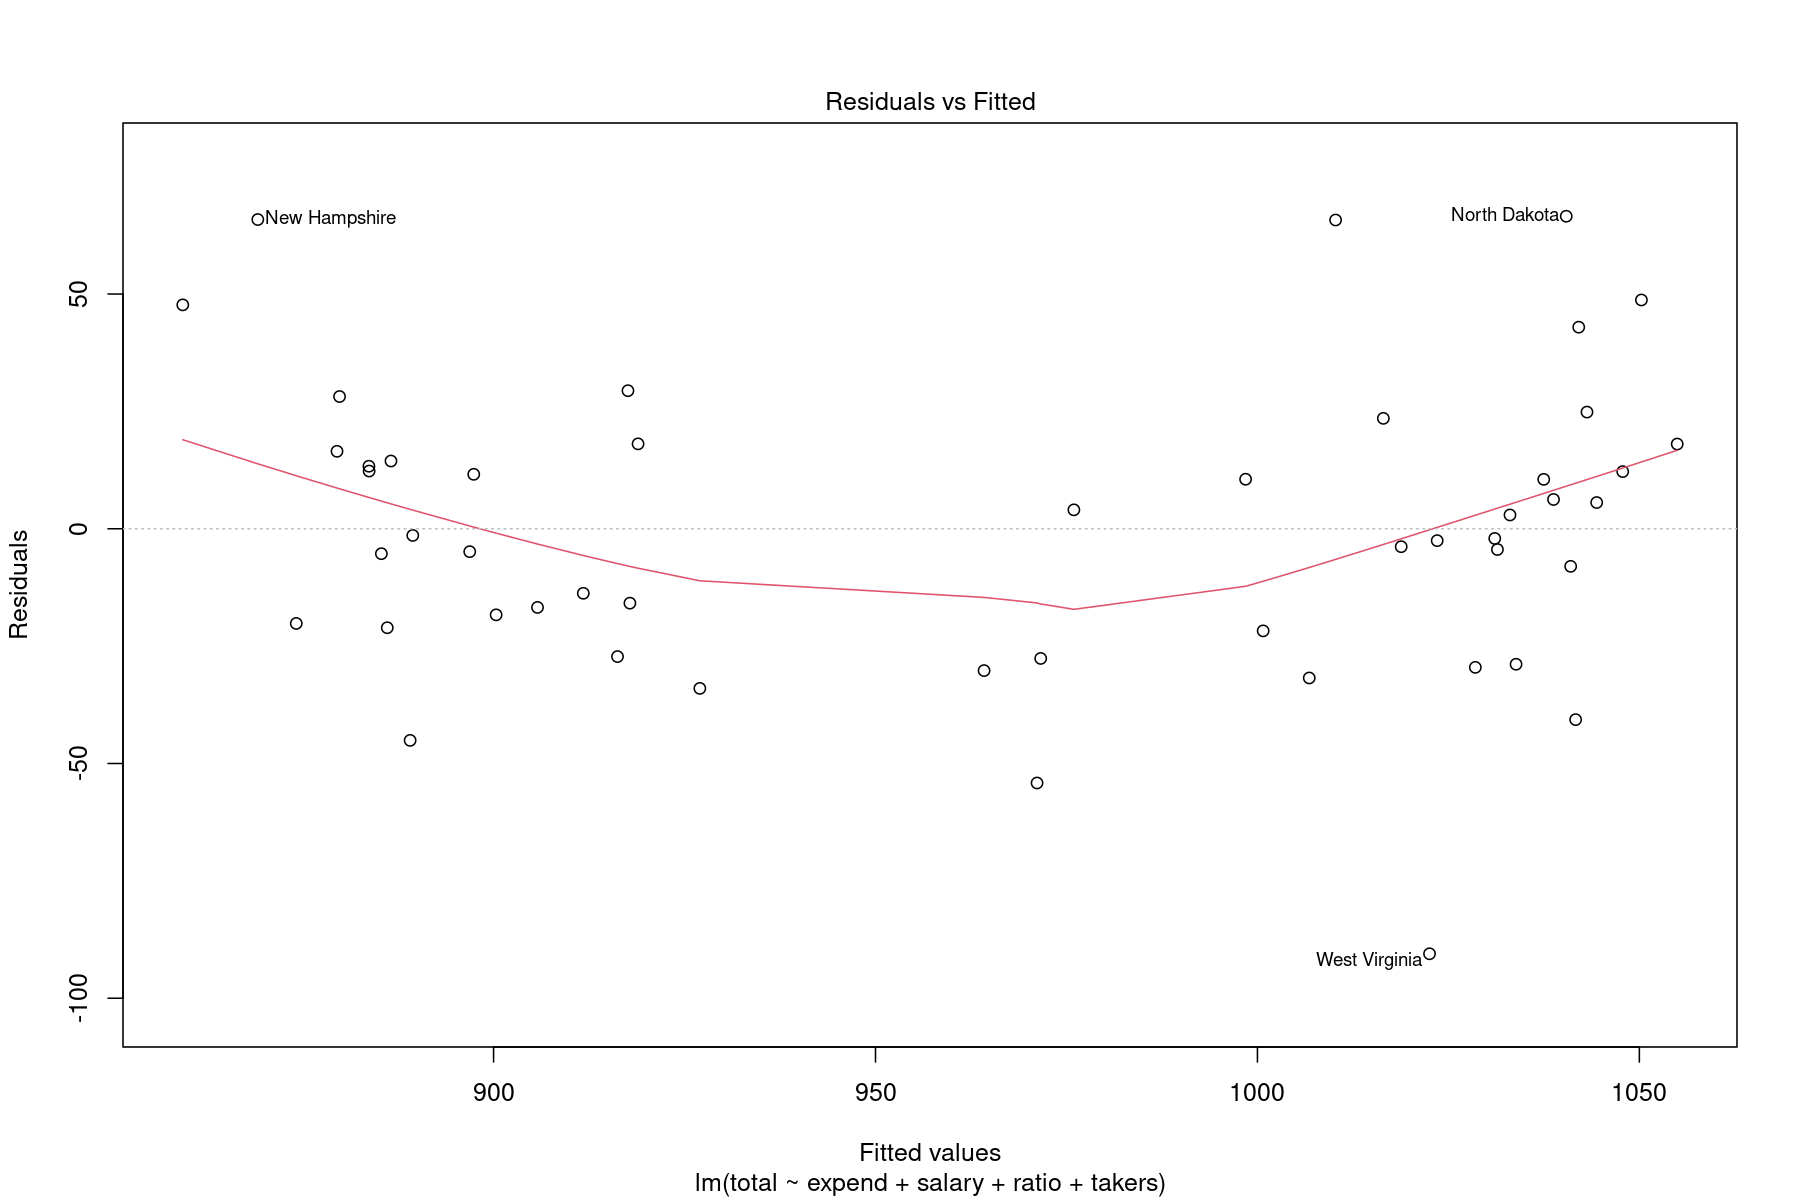

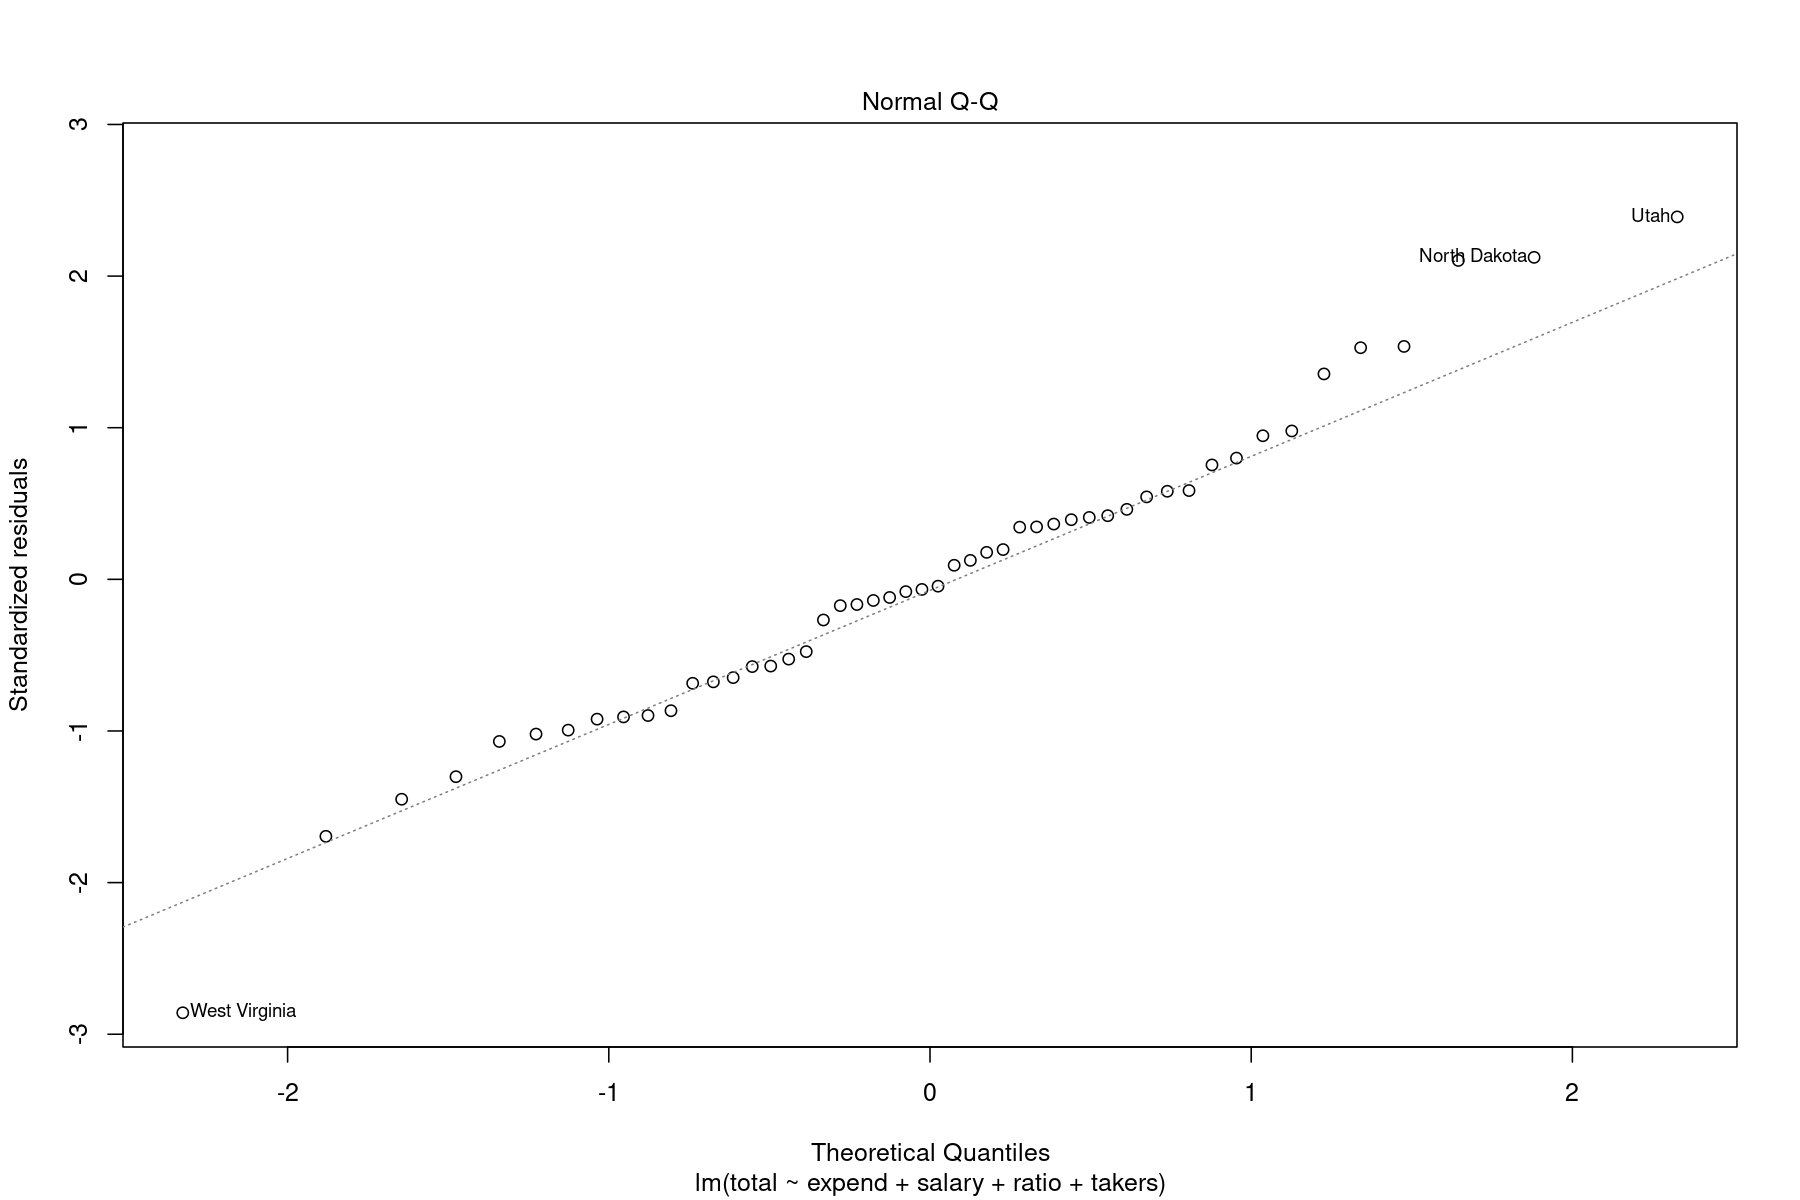

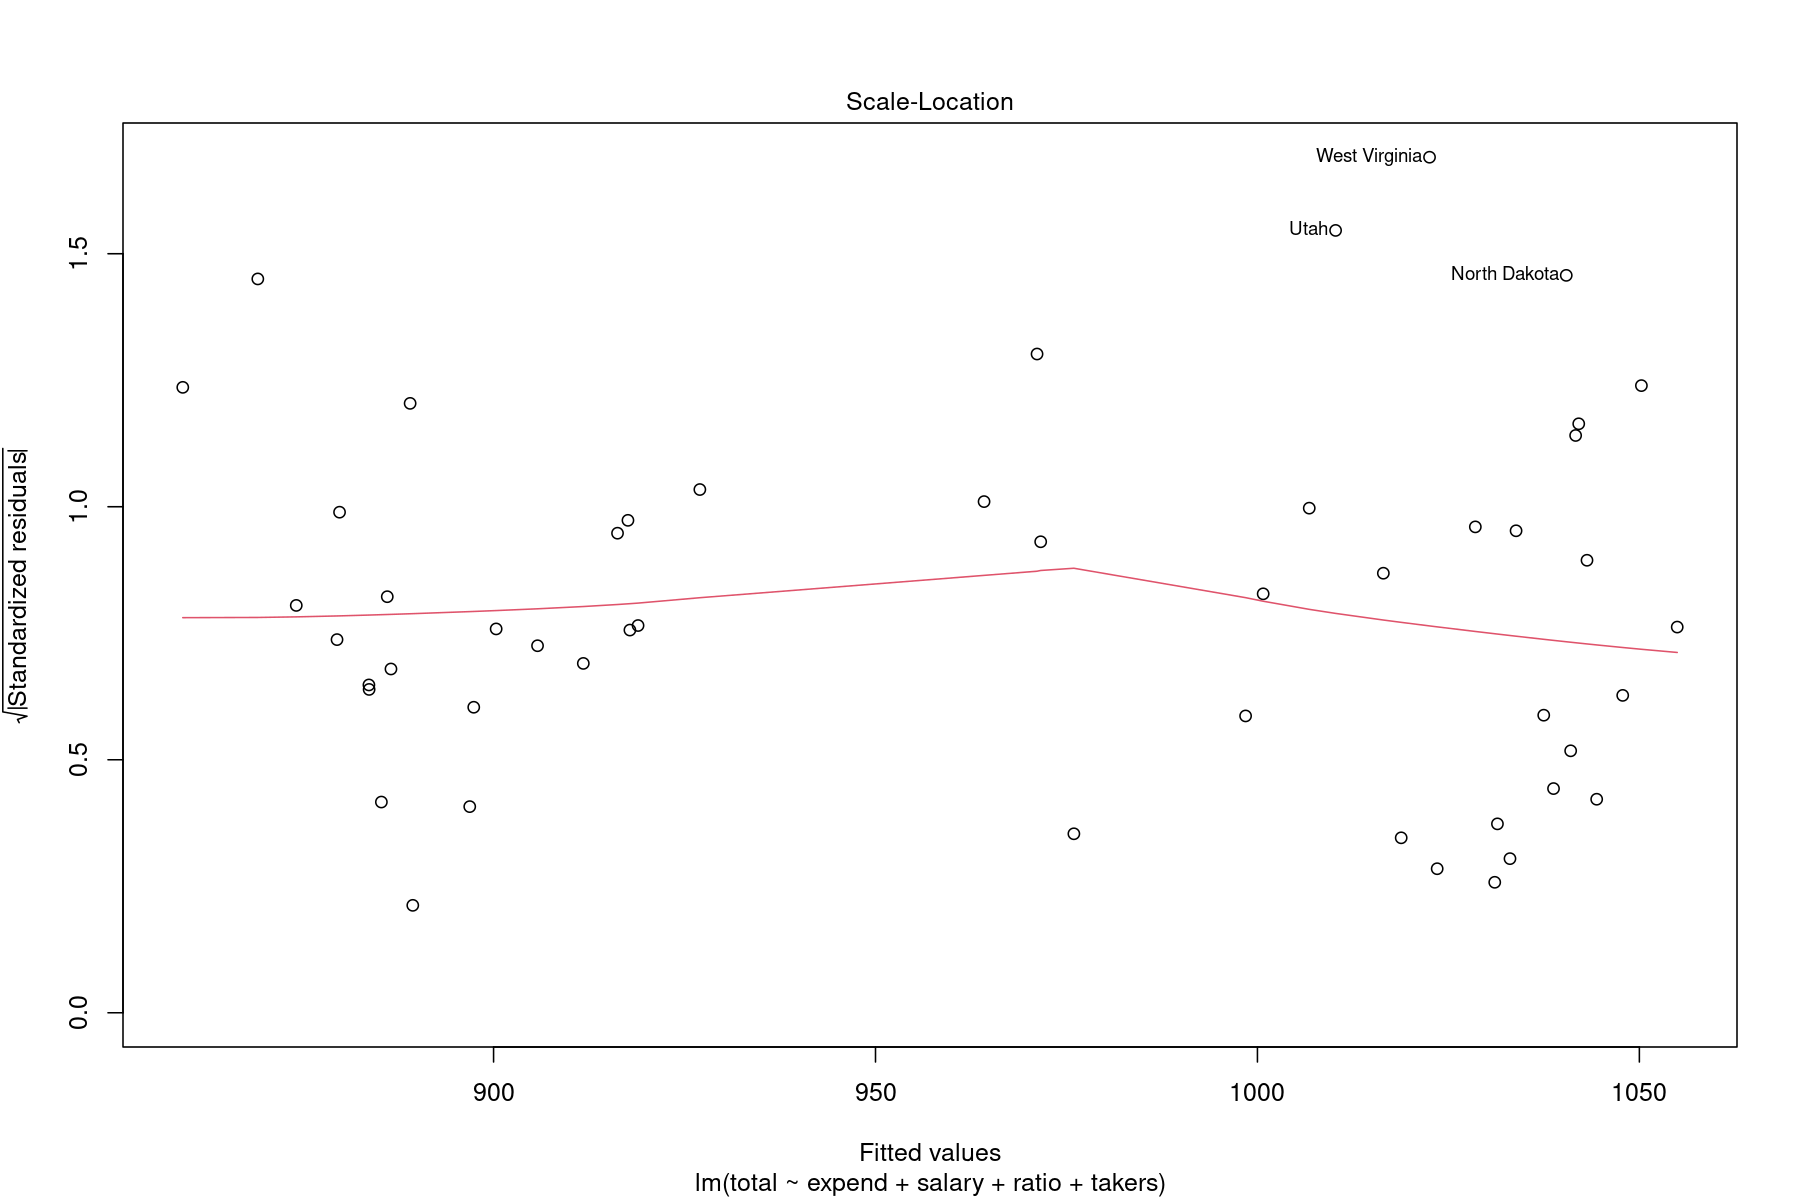

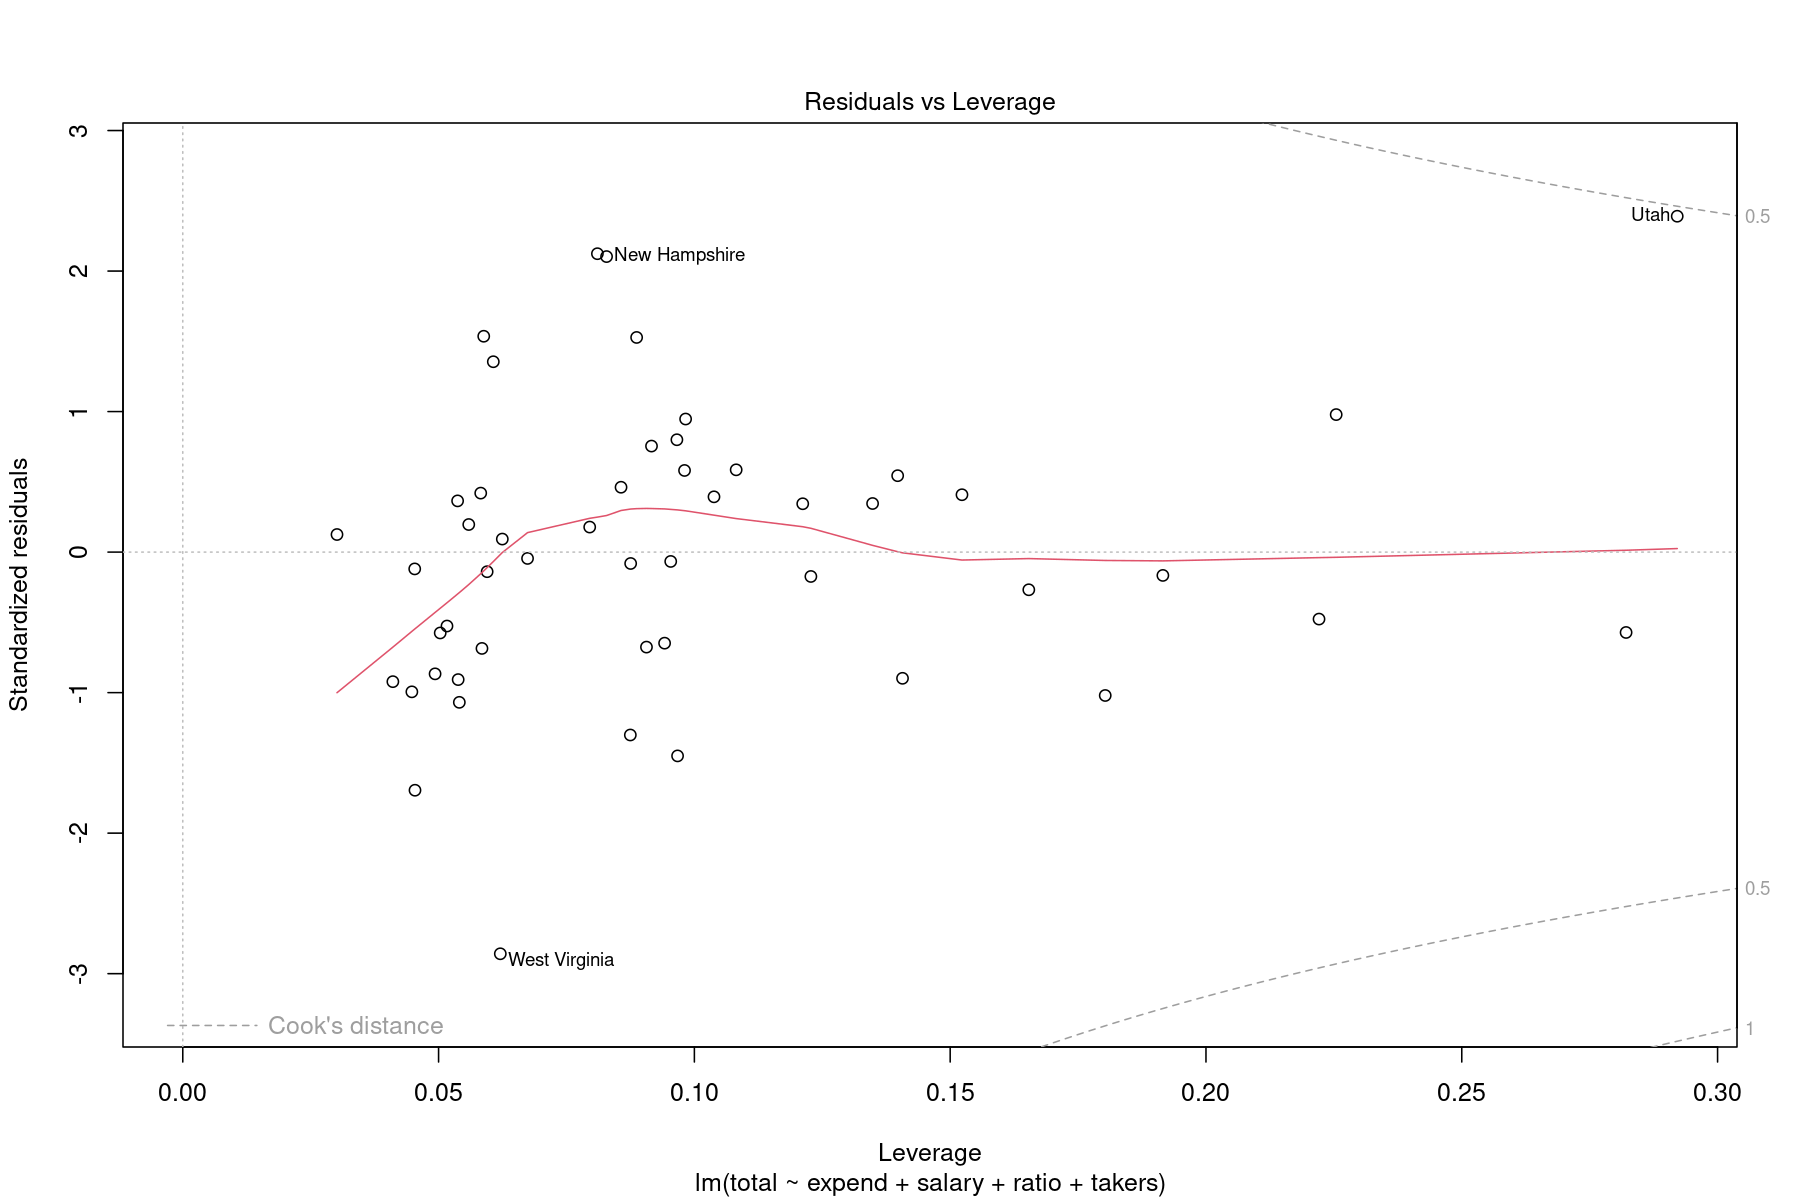

In [12]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 150)

sat_model1 <- lm(total ~ expend + salary + ratio + takers, data = sat)
summary(sat_model1)
plot(sat_model1)

In [13]:
bptest(sat_model1, studentize = FALSE)
ncvTest(sat_model1)
shapiro.test(sat_model1$residuals)
dwtest(sat_model1)


	Breusch-Pagan test

data:  sat_model1
BP = 2.7234, df = 4, p-value = 0.6051


Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.6972119, Df = 1, p = 0.40372


	Shapiro-Wilk normality test

data:  sat_model1$residuals
W = 0.97691, p-value = 0.4304



	Durbin-Watson test

data:  sat_model1
DW = 2.4525, p-value = 0.9459
alternative hypothesis: true autocorrelation is greater than 0


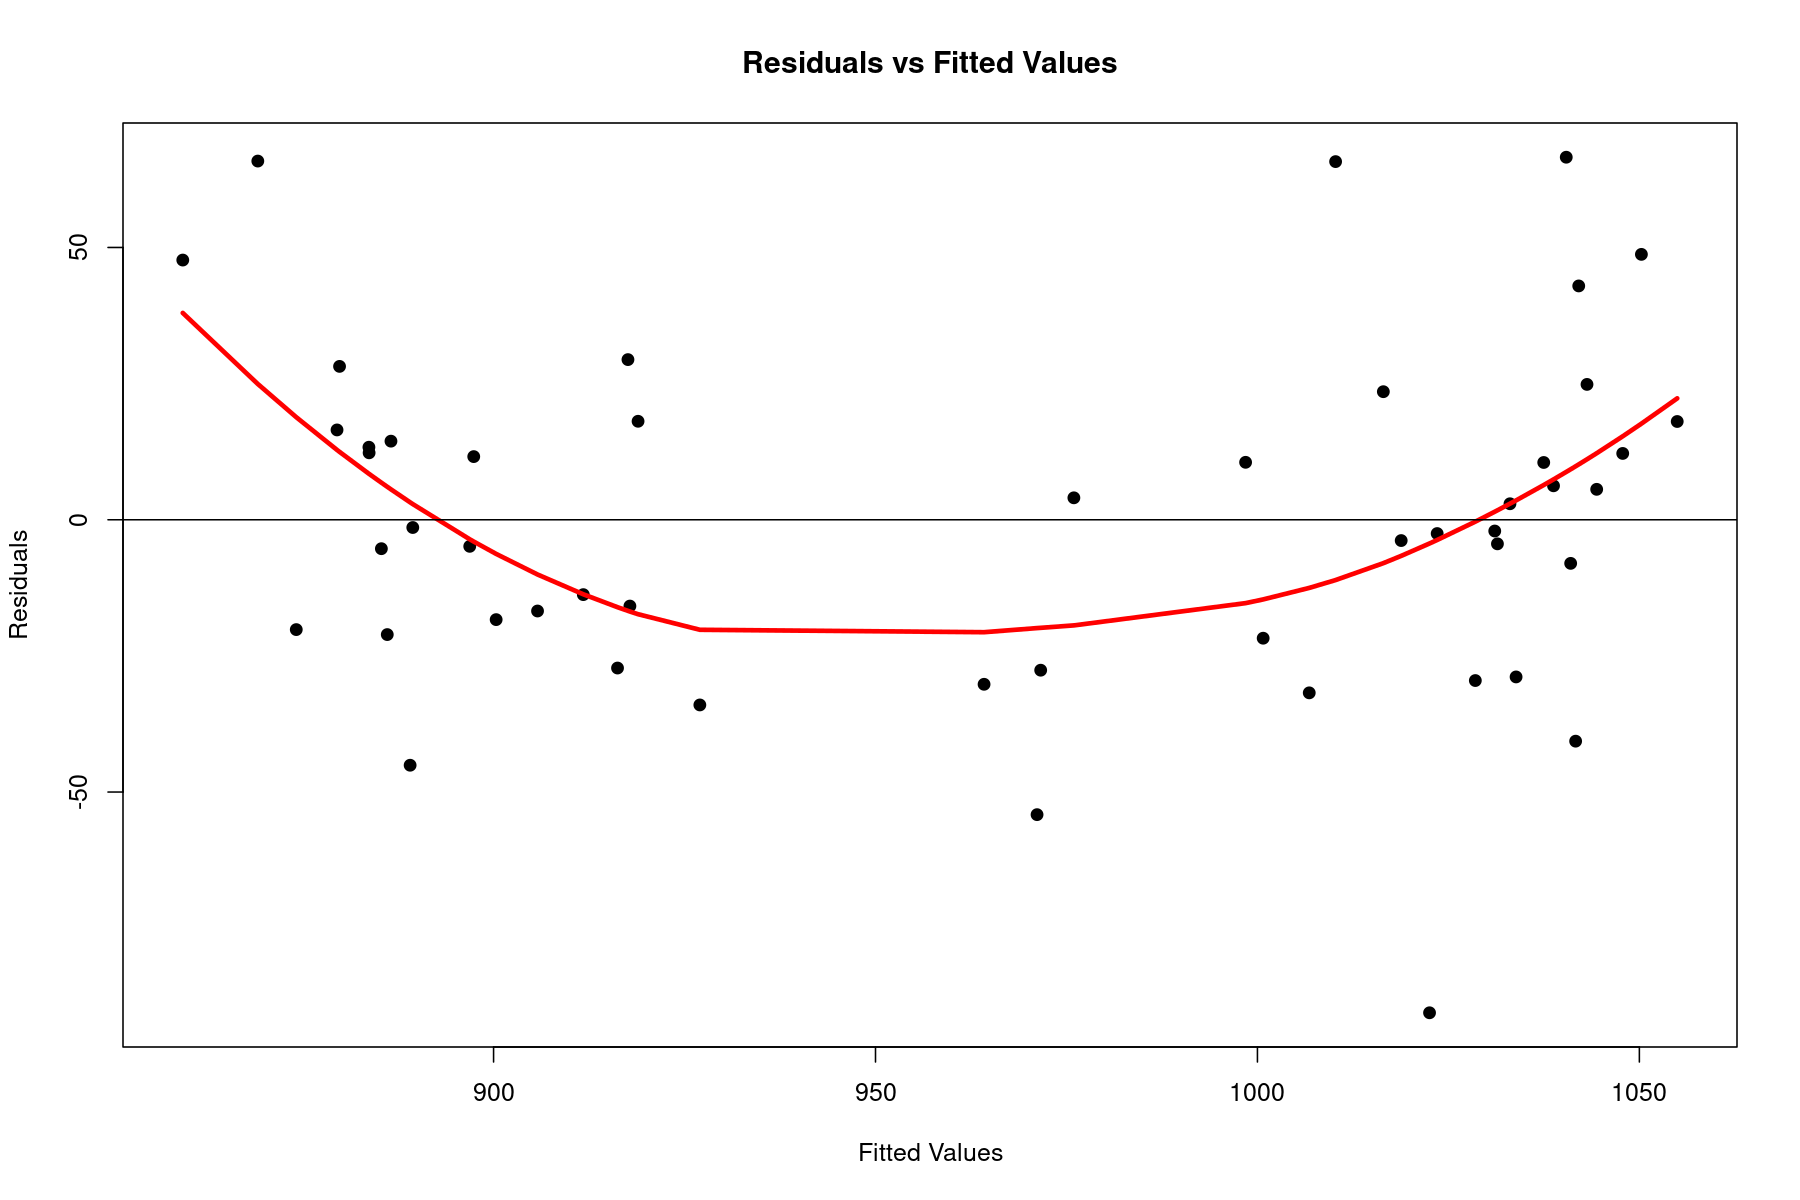

In [14]:
plot(x = sat_model1$fitted.values, y = sat_model1$residuals, pch = 19,
     main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")
res_line <- loess(sat_model1$residuals ~ sat_model1$fitted.values)
j <- order(sat_model1$fitted.values)
lines(sat_model1$fitted.values[j], res_line$fitted[j], col = "red", lwd = 3)
abline(h = 0)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
               rstudent unadjusted p-value Bonferroni p
West Virginia -3.124428          0.0031496      0.15748

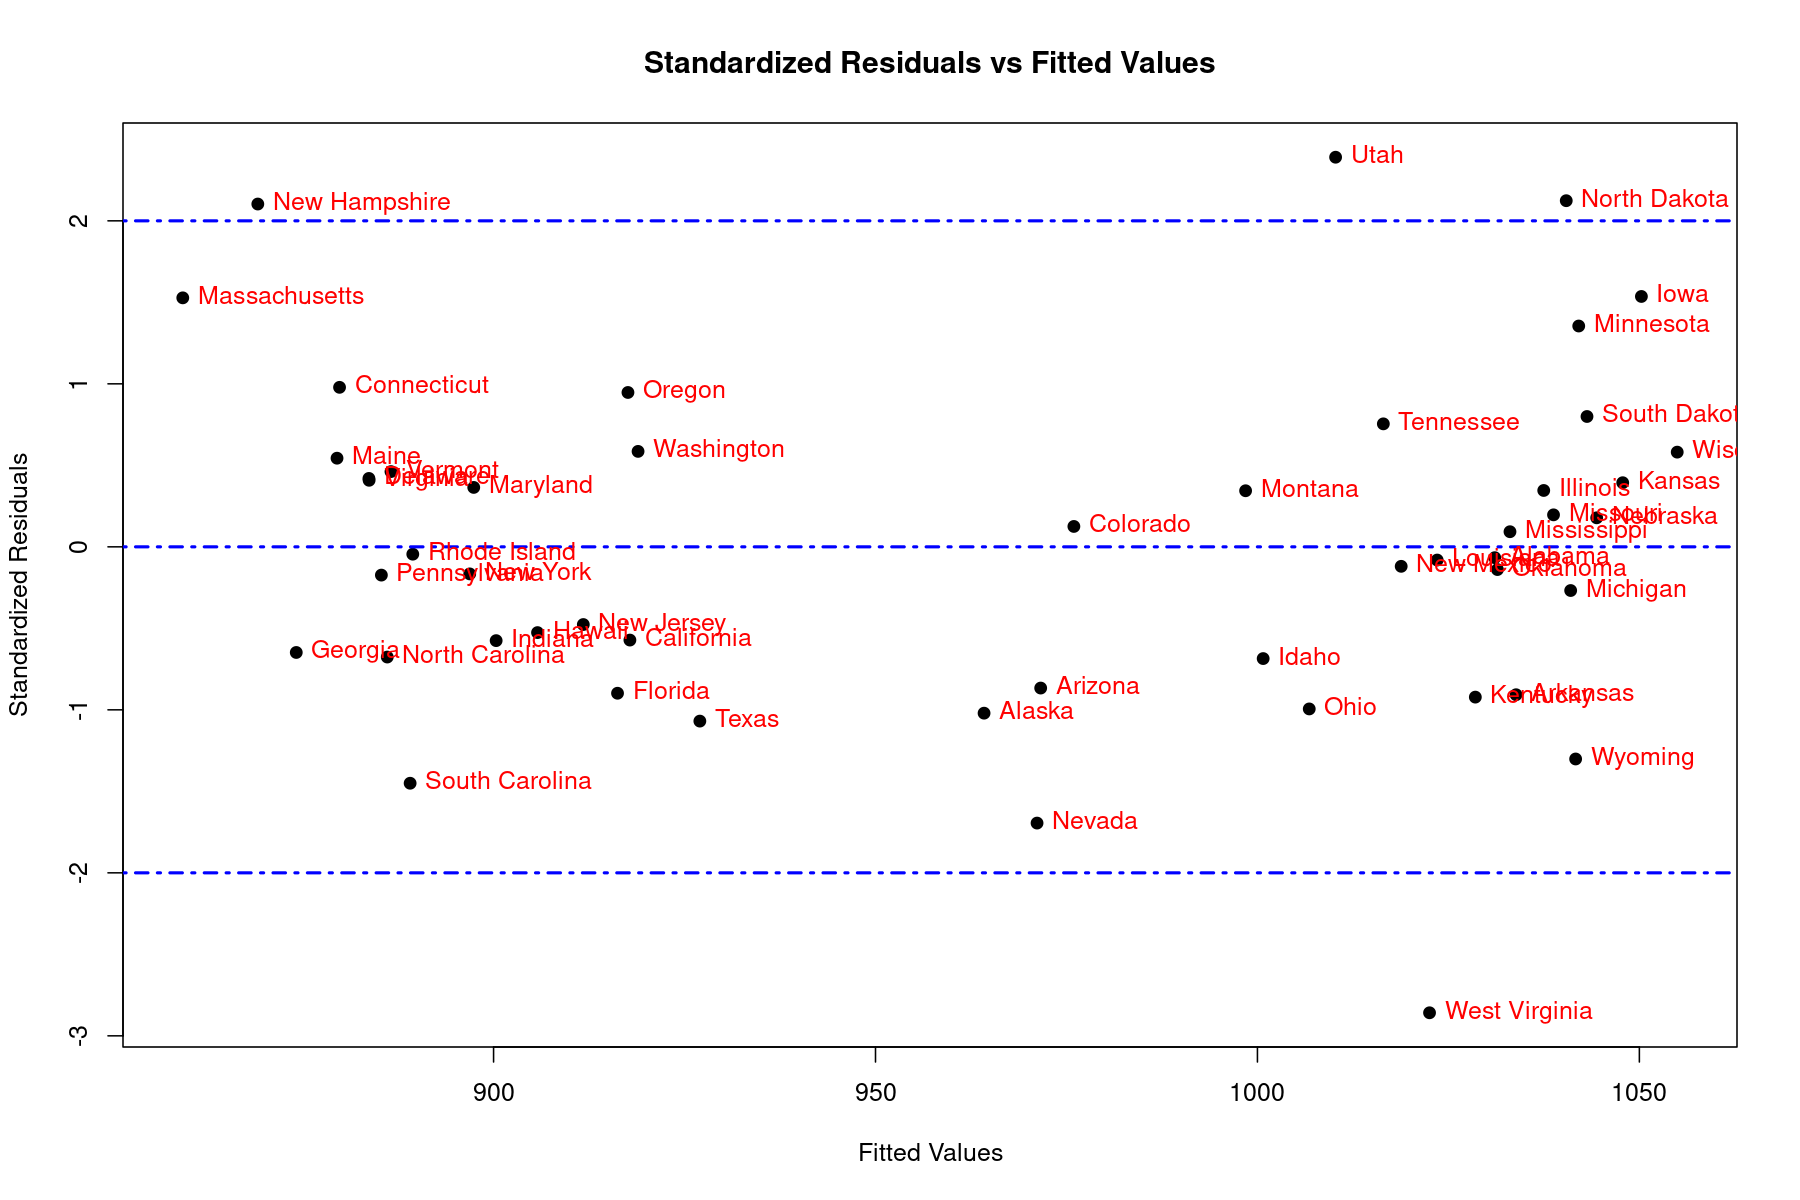

In [15]:
res_mean <- mean(sat_model1$residuals)
res_sd <- sd(sat_model1$residuals)
stan_res <- (sat_model1$residuals - res_mean) / res_sd

#plot(x = sat_model1$fitted.values, y = stan_res, pch = 19,
#     main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

#using built in standardize function
plot(x = sat_model1$fitted.values, y = rstandard(sat_model1), pch = 19,
     main = "Standardized Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Standardized Residuals")
abline(h = c(0, 2, -2), col = "blue", lty = 4, lwd = 2)
text(x = sat_model1$fitted.values, y = rstandard(sat_model1), rownames(sat), 
     cex = 1, pos = 4, col = "red")

outlierTest(sat_model1)

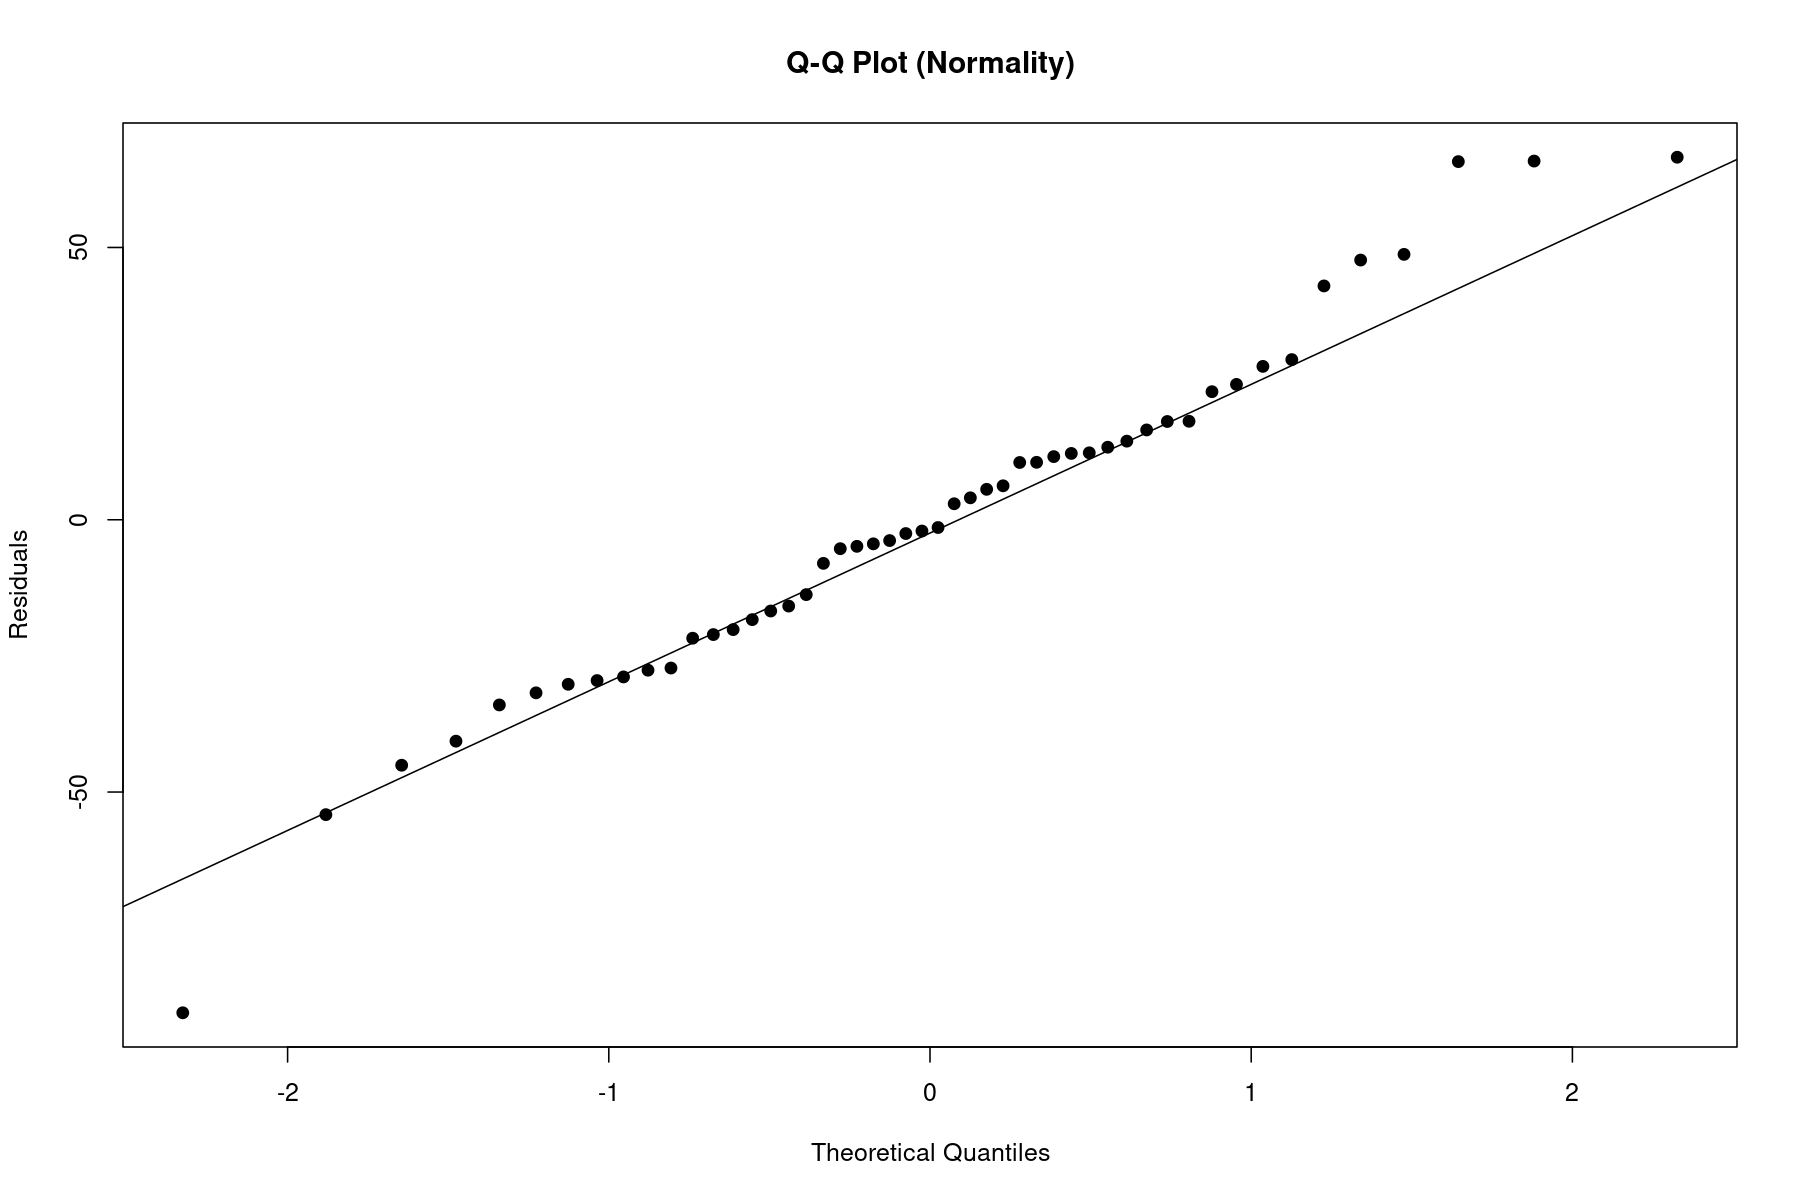

In [16]:
qqnorm(sat_model1$residuals, ylab = "Residuals", main = "Q-Q Plot (Normality)", pch = 19)
qqline(sat_model1$residuals)

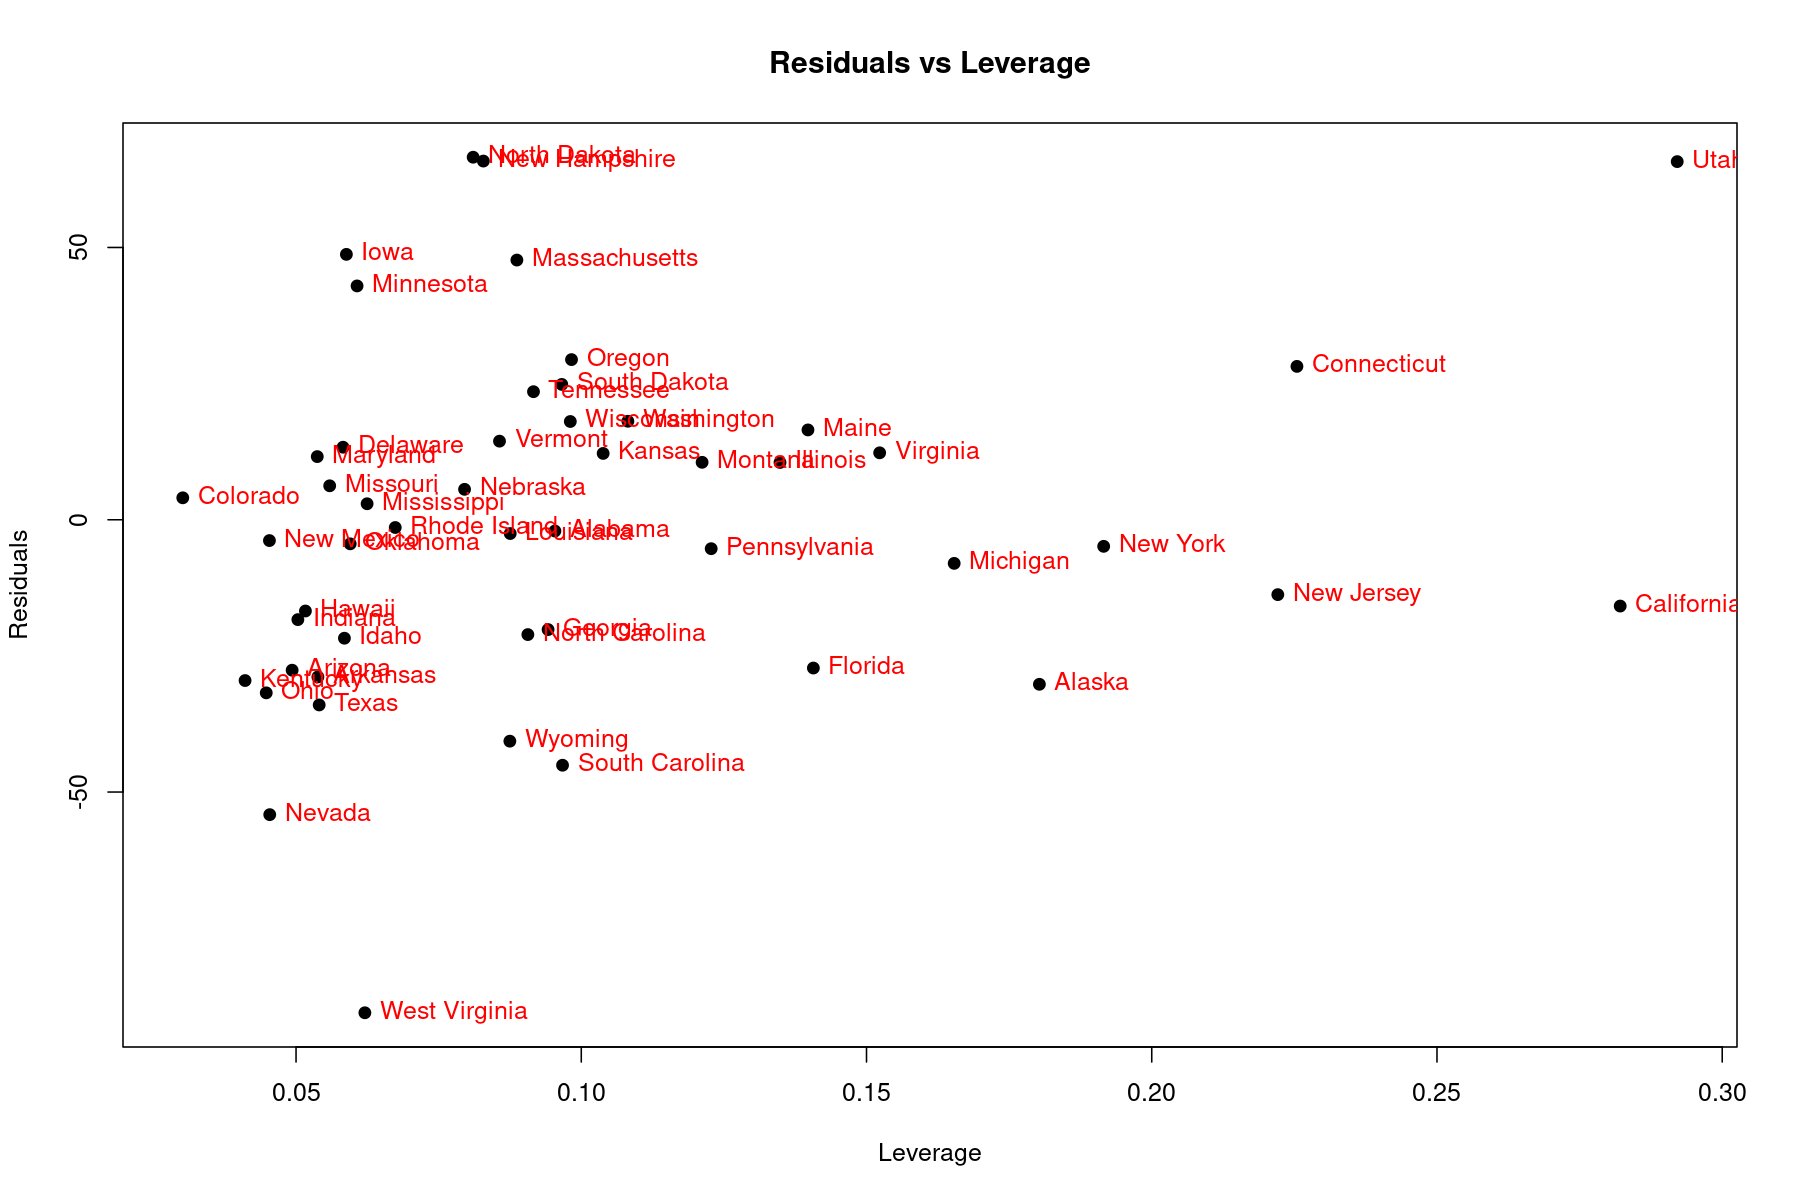

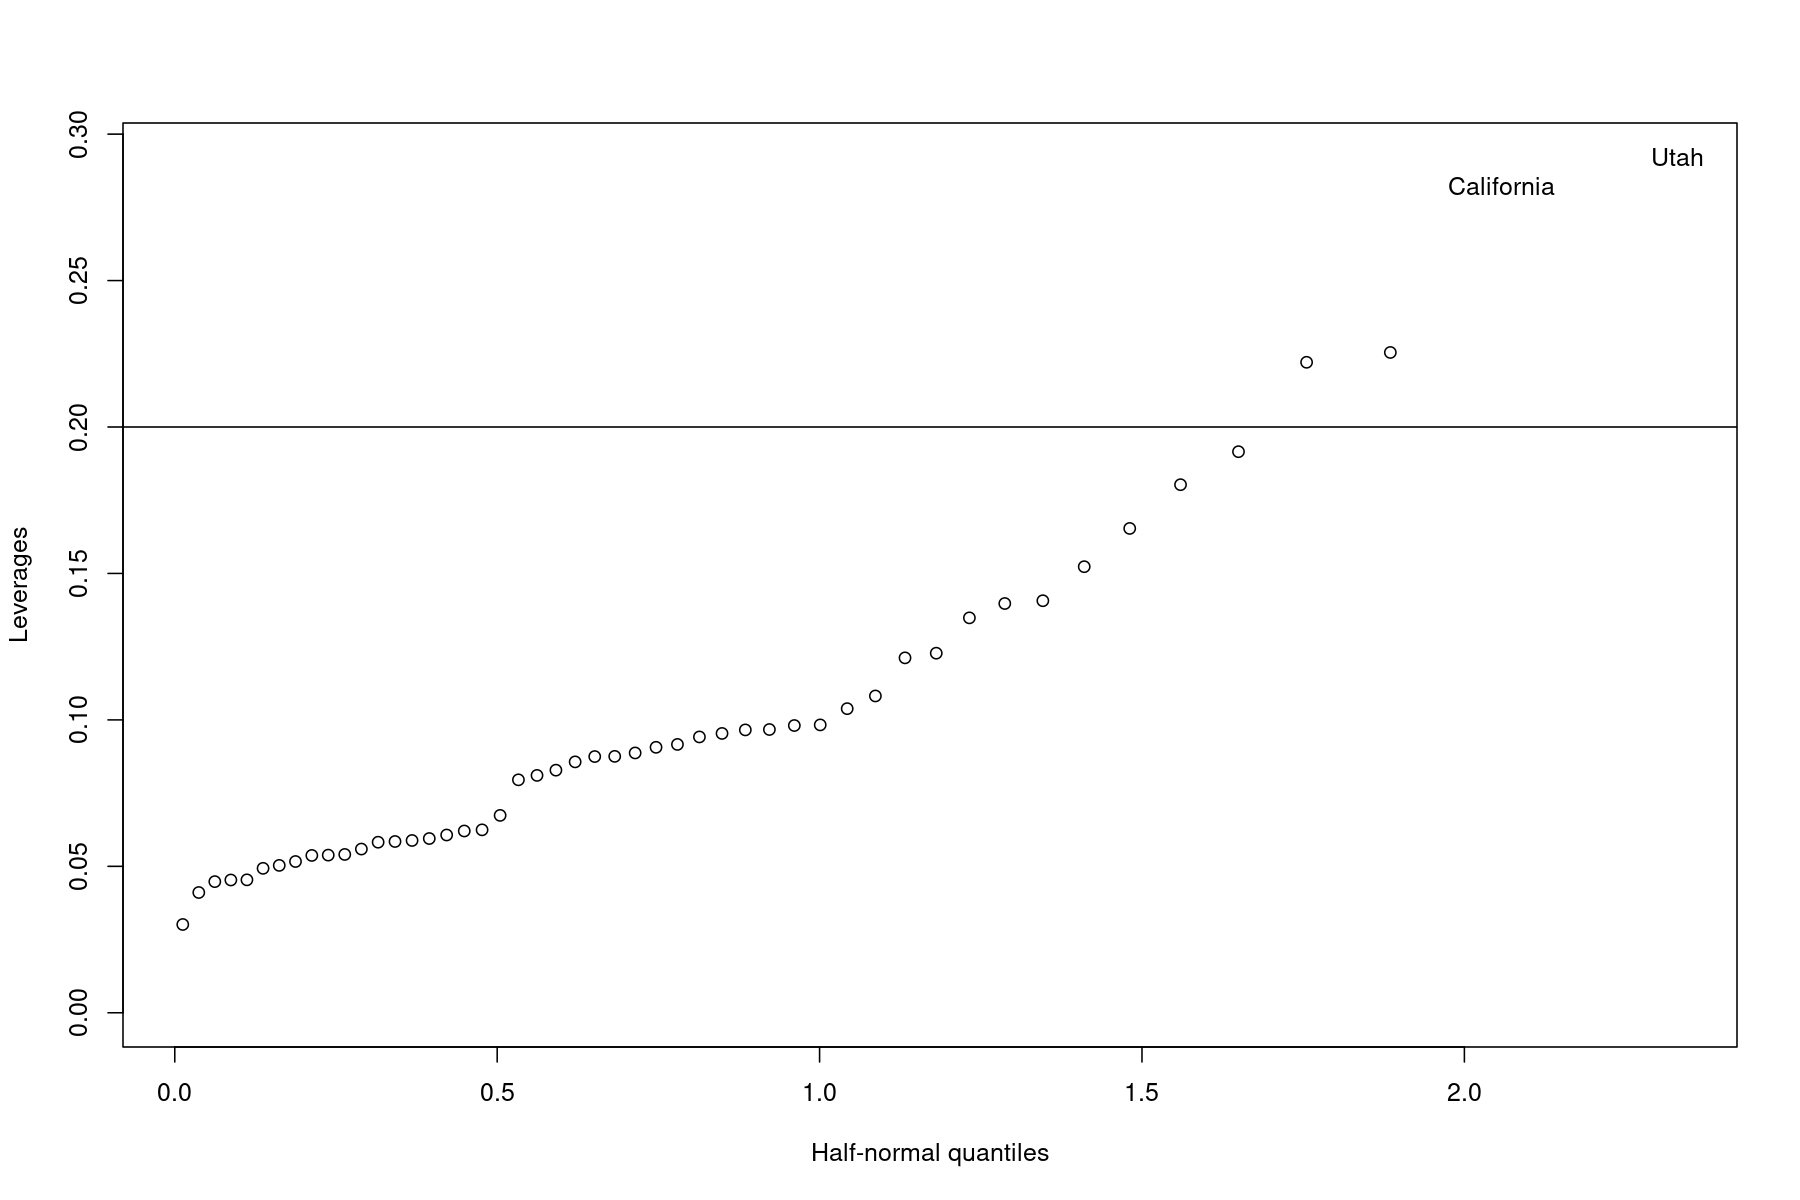

In [17]:
X <- sat %>% select(expend, salary, ratio, takers)
X <- cbind(rep(1, nrow(X)), X)

X <- data.matrix(X)

#print(X)
Xt <- t(X)

XtX_inv <- solve(Xt %*% X)

XtY <- Xt %*% sat$total

beta_hat <- XtX_inv %*% XtY

P <- X %*% XtX_inv %*% Xt

res_mean <- mean(sat_model1$residuals)
res_sd <- sd(sat_model1$residuals)
stan_res <- (sat_model1$residuals - res_mean) / res_sd

plot(x = diag(P), 
     y = sat_model1$residuals, 
     pch = 19,
     main = "Residuals vs Leverage", 
     xlab = "Leverage", 
     ylab = "Residuals")
text(diag(P), sat_model1$residuals, rownames(P), 
     cex = 1, pos = 4, col = "red")

#cooks.distance(sat_model1)

halfnorm(diag(P), labs = rownames(P), ylab = "Leverages")
abline(h = 2 * sat_model1$rank / nrow(sat))

SST <- sum((sat$total - mean(sat$total))^2)
SSR <- sum((sat_model1$fitted.values - mean(sat$total))^2)
SSE <- sum((sat$total - sat_model1$fitted.values)^2)
MSR <- SSR/(sat_model1$rank - 1)
MSE <- SSE/(nrow(sat) - sat_model1$rank)

cooks_dis_calc <- sat_model1$residuals^2 / (sat_model1$rank * MSE) * (diag(P)/(1-diag(P))^2)

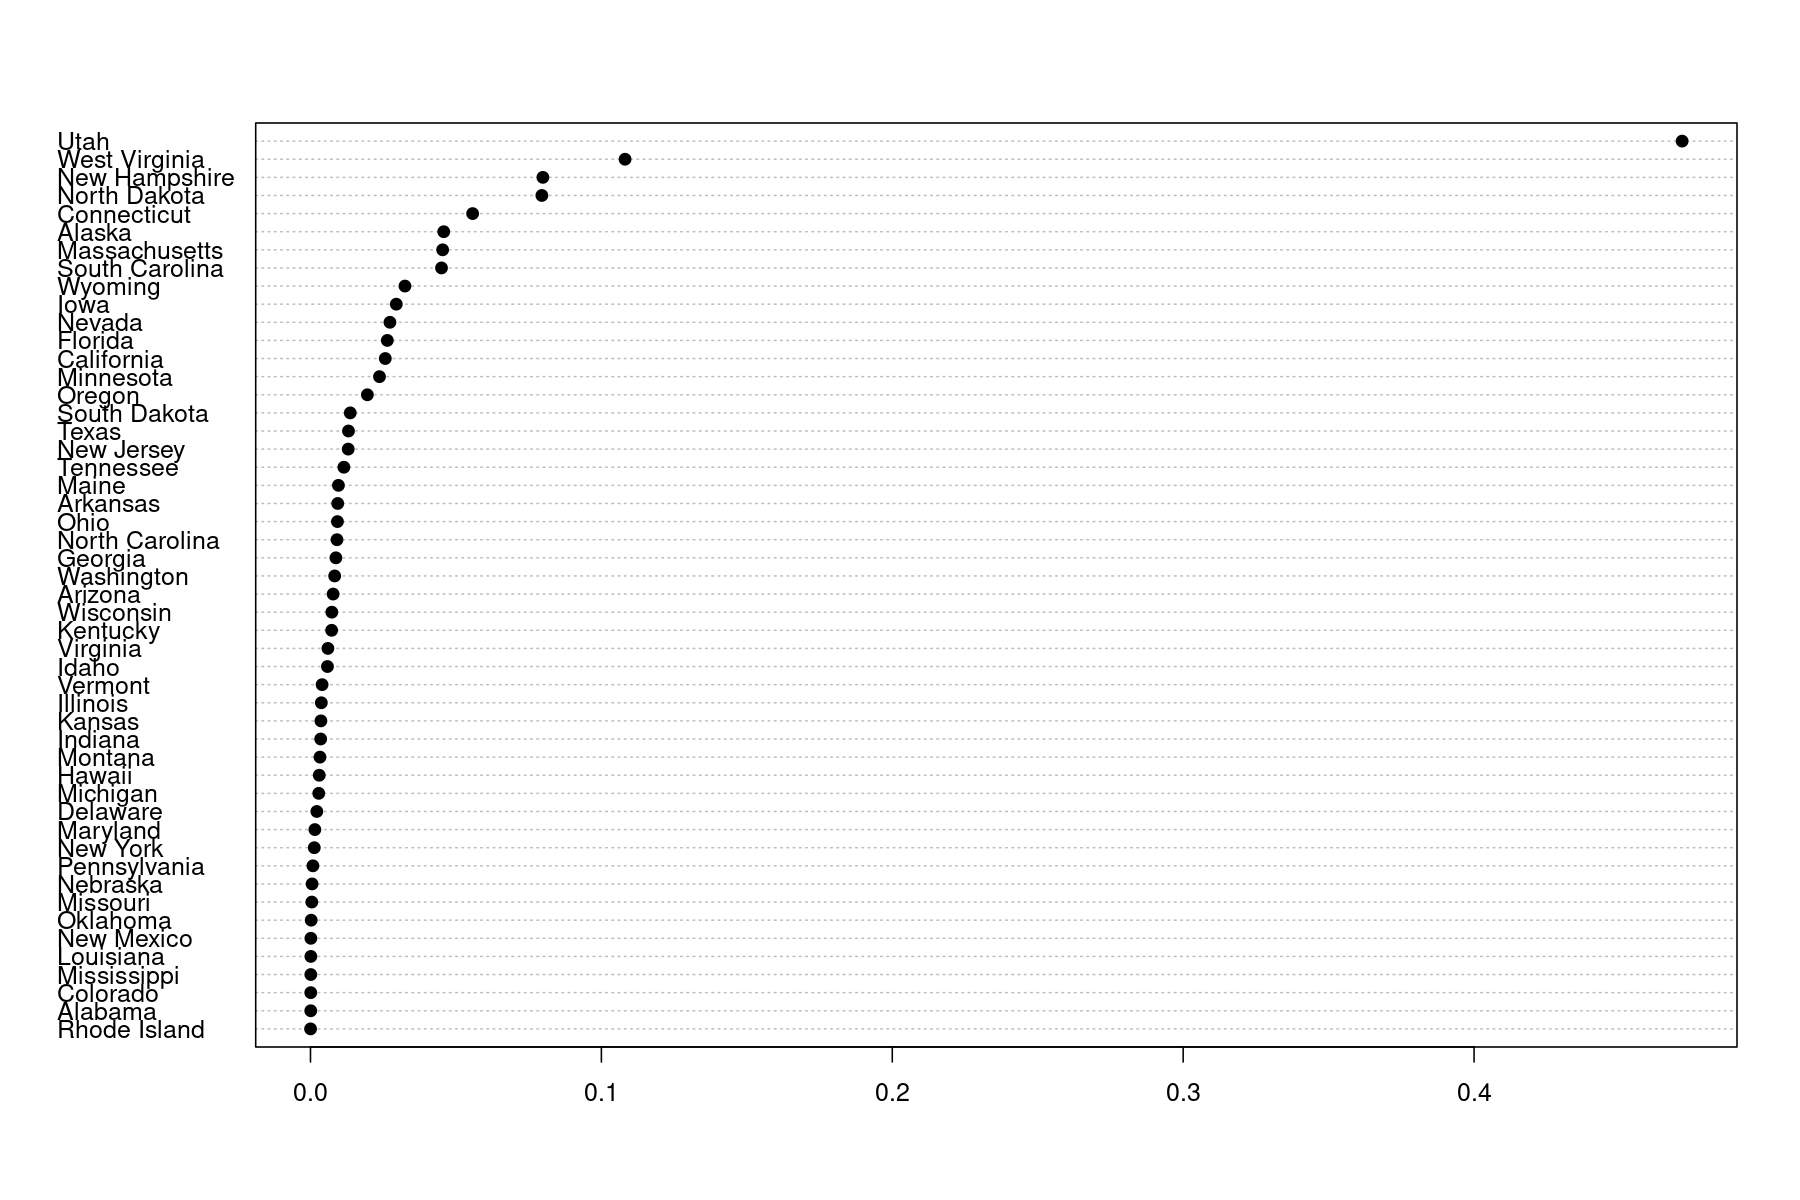

In [18]:
dotchart(sort(cooks_dis_calc), pch = 19)

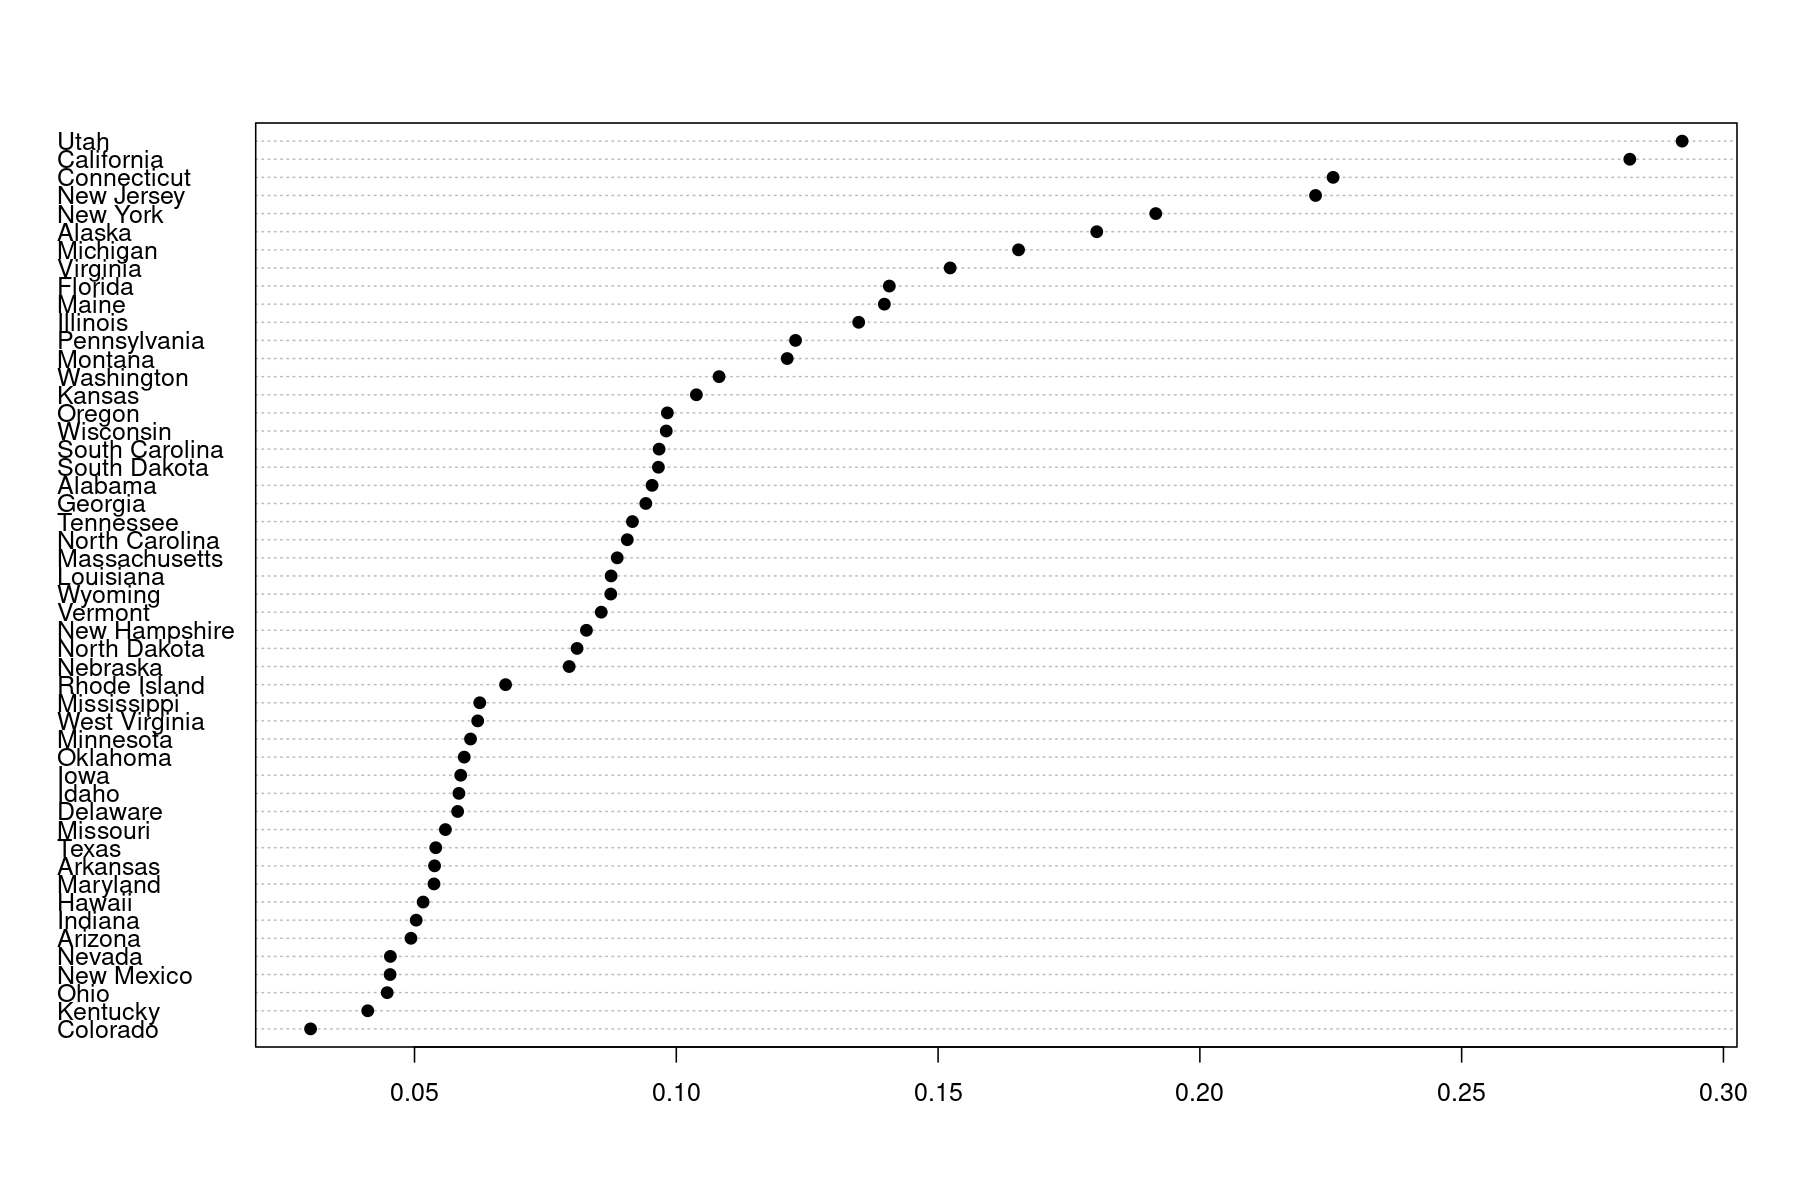

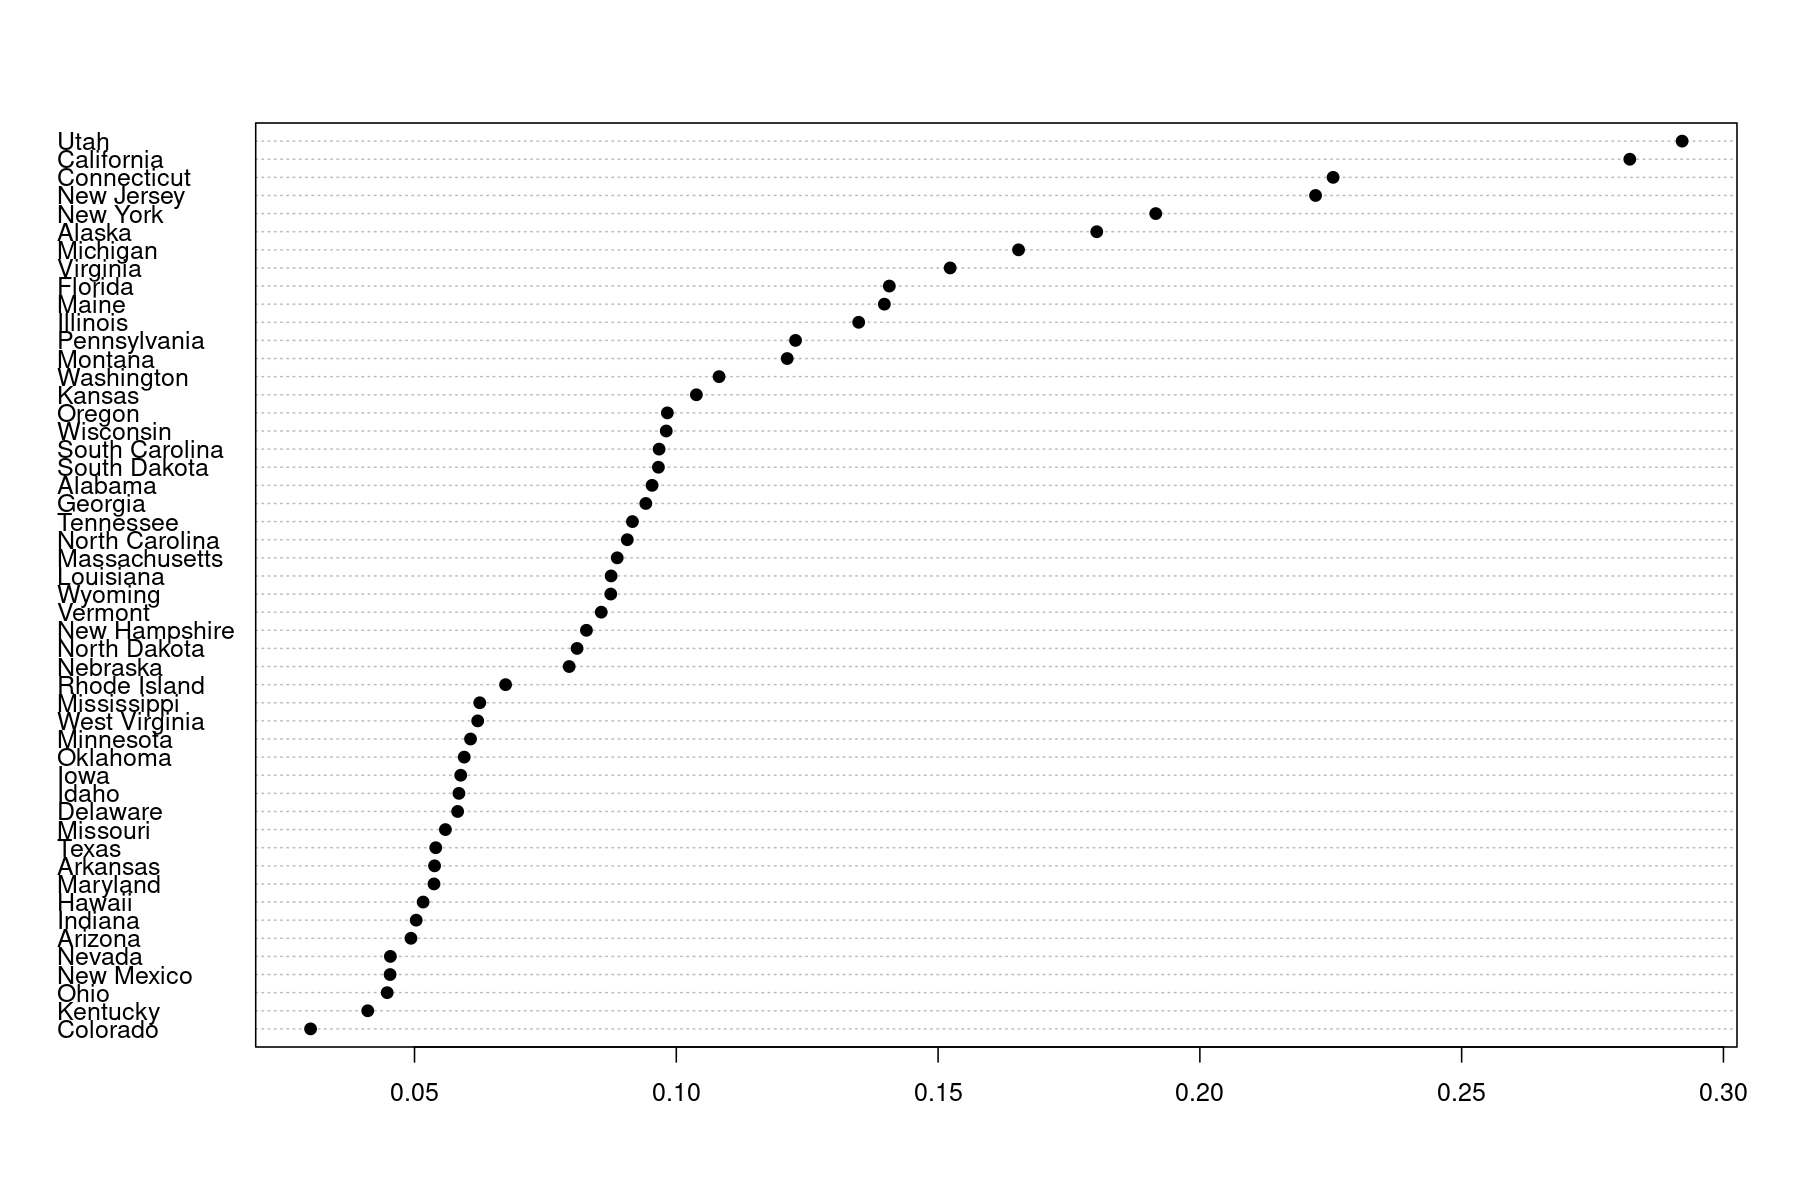

In [19]:
dotchart(sort(hatvalues(sat_model1)), pch = 19)
dotchart(sort(diag(P)), pch = 19)

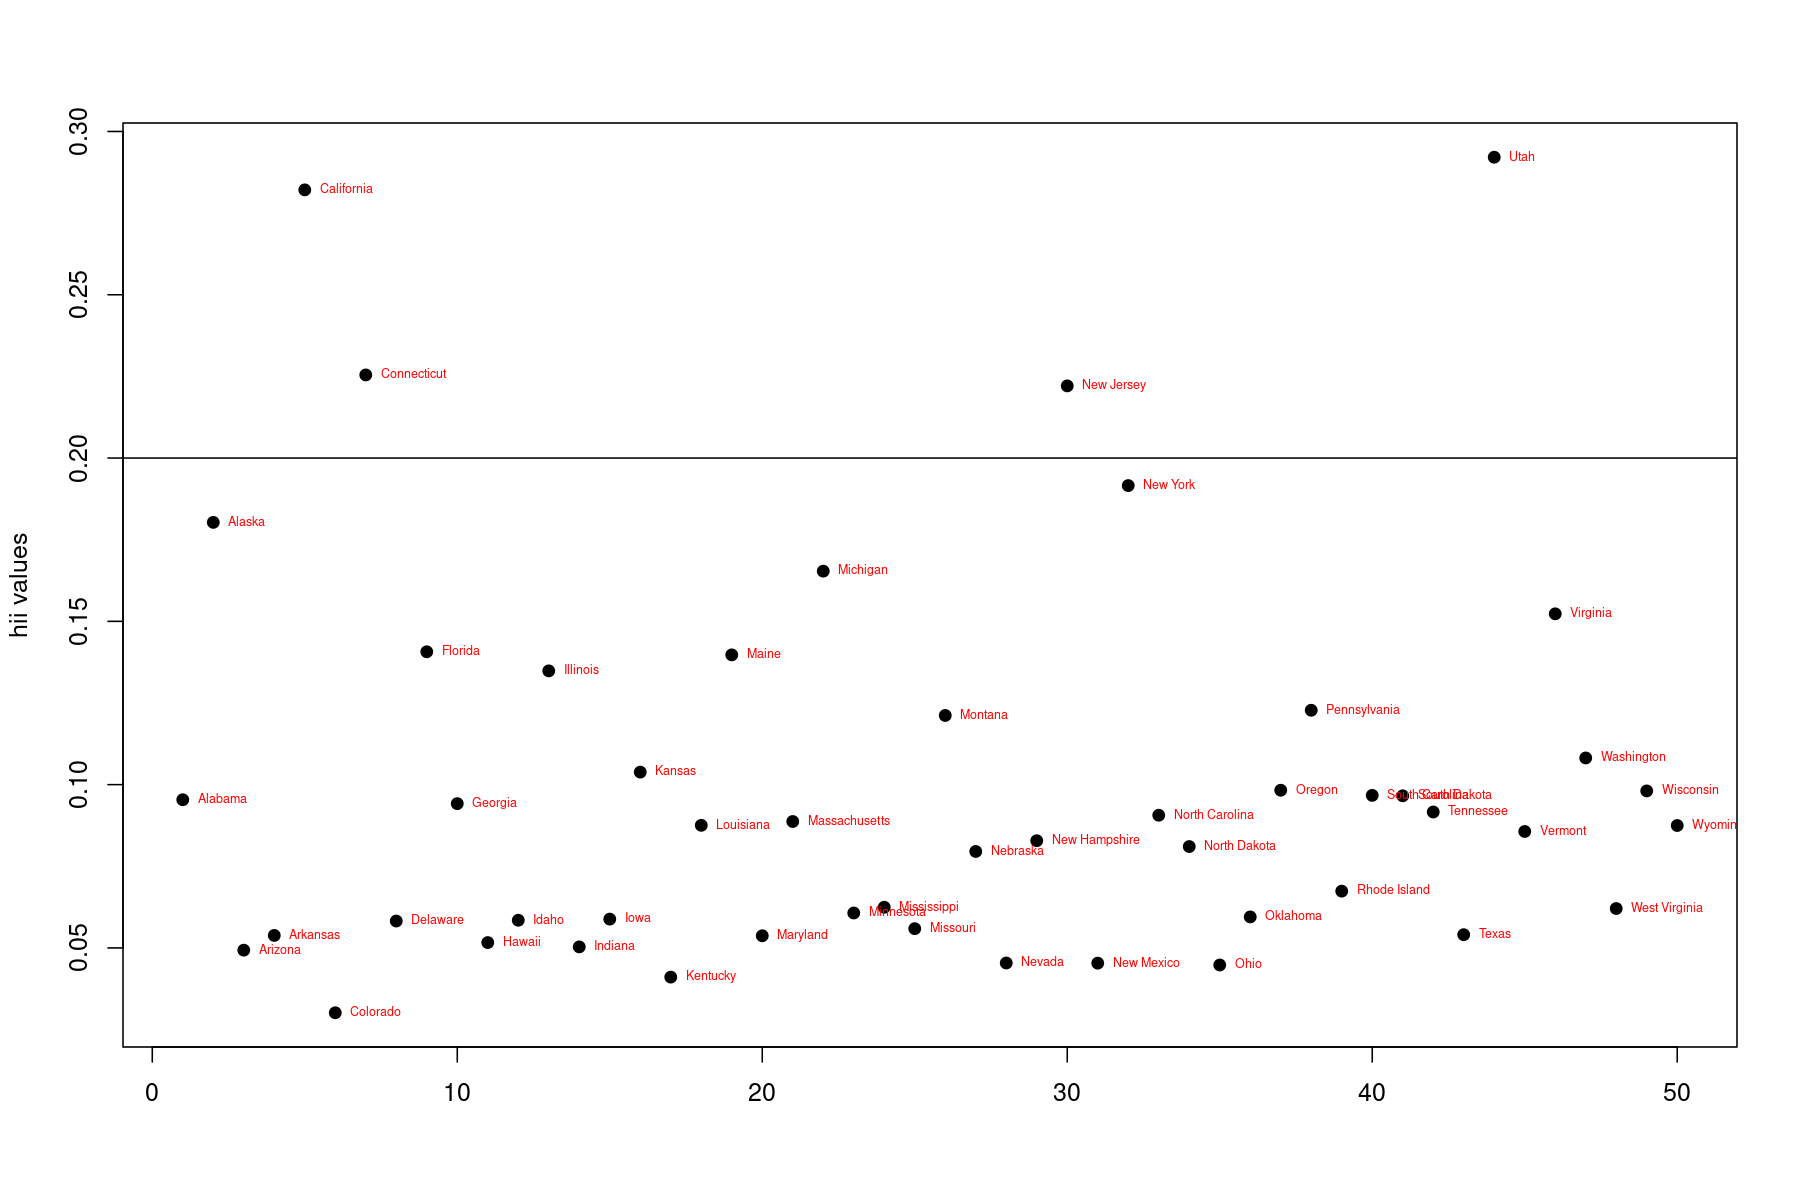

In [20]:
hat_data <- cbind(1:50, diag(P))

plot(hat_data, pch = 19, xlab = "", ylab = "hii values")
abline(h = 2 * 5 / 50)
text(hat_data[,1], hat_data[,2], names(diag(P)), 
     cex = 0.5, pos = 4, col = "red")

Influence measures of
	 lm(formula = total ~ expend + salary + ratio + takers, data = sat) :

                  dfb.1_  dfb.expn dfb.slry dfb.rati  dfb.tkrs   dffit cov.r
Alabama        -0.010968  0.016083 -0.01465  0.01246  0.009287 -0.0213 1.236
Alaska          0.329192 -0.203908  0.01885 -0.15367  0.162010 -0.4788 1.214
Arizona         0.039954  0.012636  0.01592 -0.08386 -0.031505 -0.1968 1.082
Arkansas       -0.102502  0.072421 -0.04365  0.05947  0.086620 -0.2160 1.078
California      0.174948  0.118793 -0.12779 -0.11353 -0.037696 -0.3558 1.503
Colorado       -0.004665 -0.002878  0.00275  0.00542 -0.001721  0.0218 1.152
Connecticut     0.043301 -0.241875  0.35844 -0.29431 -0.042669  0.5277 1.297
Delaware       -0.026896  0.036038 -0.03465  0.03347  0.064331  0.1034 1.165
Florida         0.171083 -0.251733  0.28991 -0.30547 -0.189656 -0.3626 1.190
Georgia        -0.089786  0.056707  0.00746  0.02730 -0.162854 -0.2076 1.179
Hawaii          0.008805  0.052365 -0.04880  0.00690 -0.048

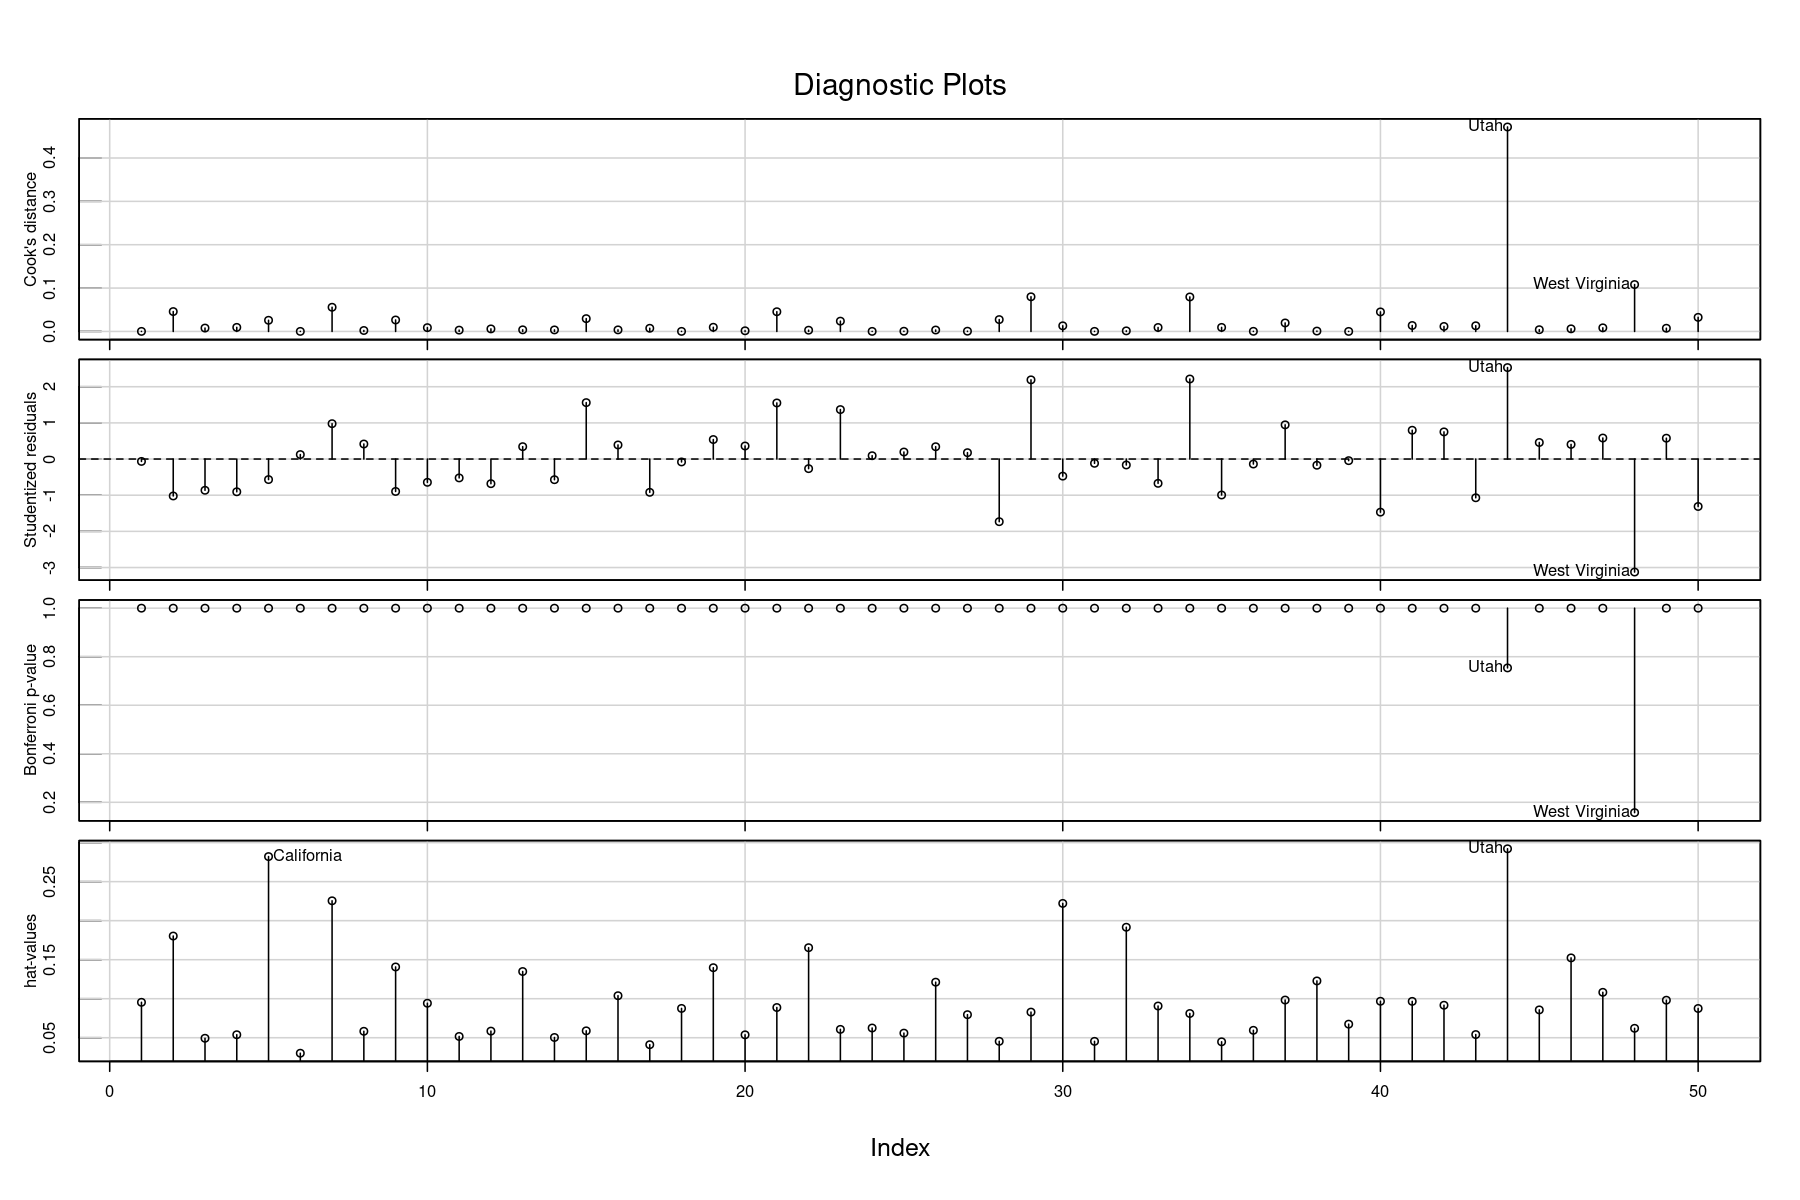

In [21]:
influenceIndexPlot(sat_model1)
influence.measures(sat_model1)

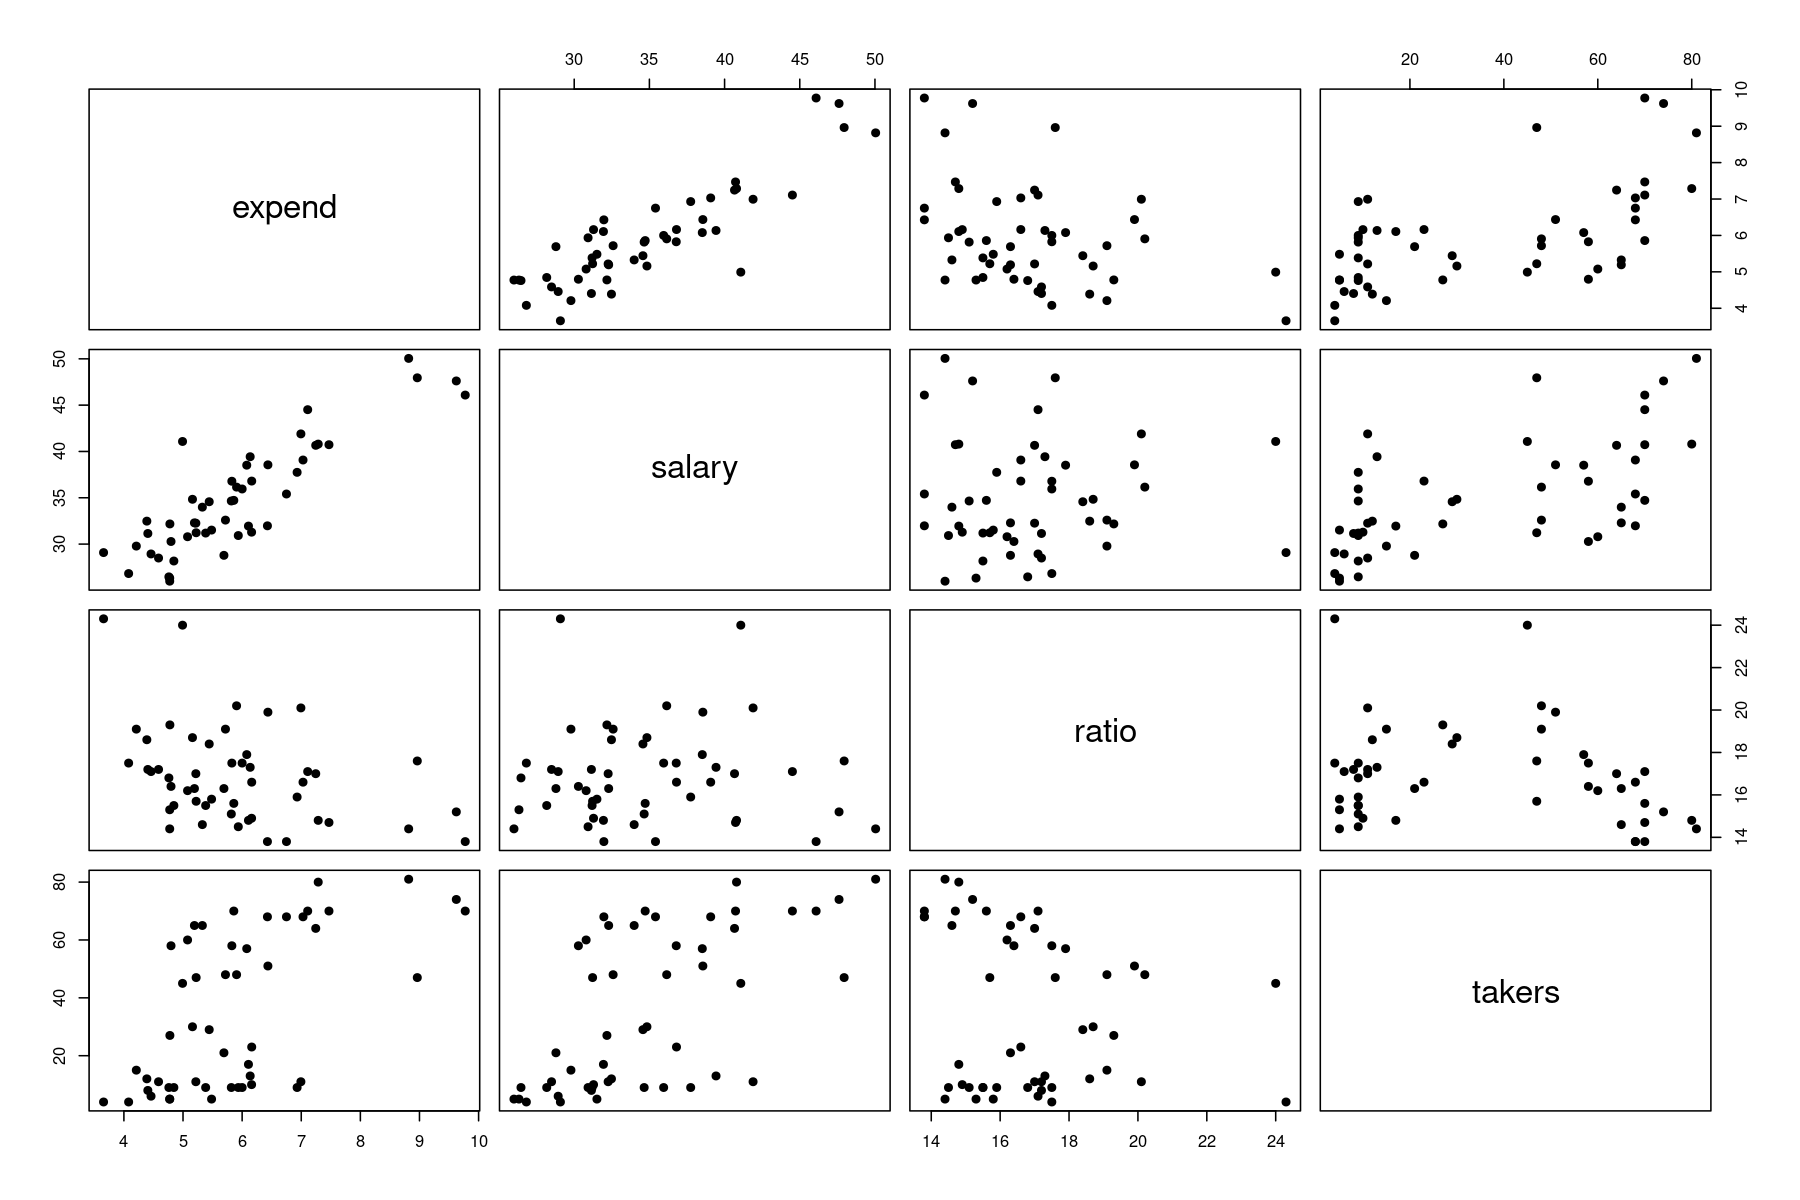

In [22]:
sat %>% select(expend, salary, ratio, takers) %>% pairs(pch = 19)

In [23]:
summary(lm(expend ~ salary, data = sat))


Call:
lm(formula = expend ~ salary, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16004 -0.38798 -0.05406  0.42641  1.62258 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.04363    0.57701  -1.809   0.0768 .  
salary       0.19951    0.01634  12.213 2.46e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6794 on 48 degrees of freedom
Multiple R-squared:  0.7566,	Adjusted R-squared:  0.7515 
F-statistic: 149.2 on 1 and 48 DF,  p-value: 2.458e-16



Call:
lm(formula = total ~ expend + salary + ratio + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
salary         1.6379     2.3872   0.686    0.496    
ratio         -3.6242     3.2154  -1.127    0.266    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


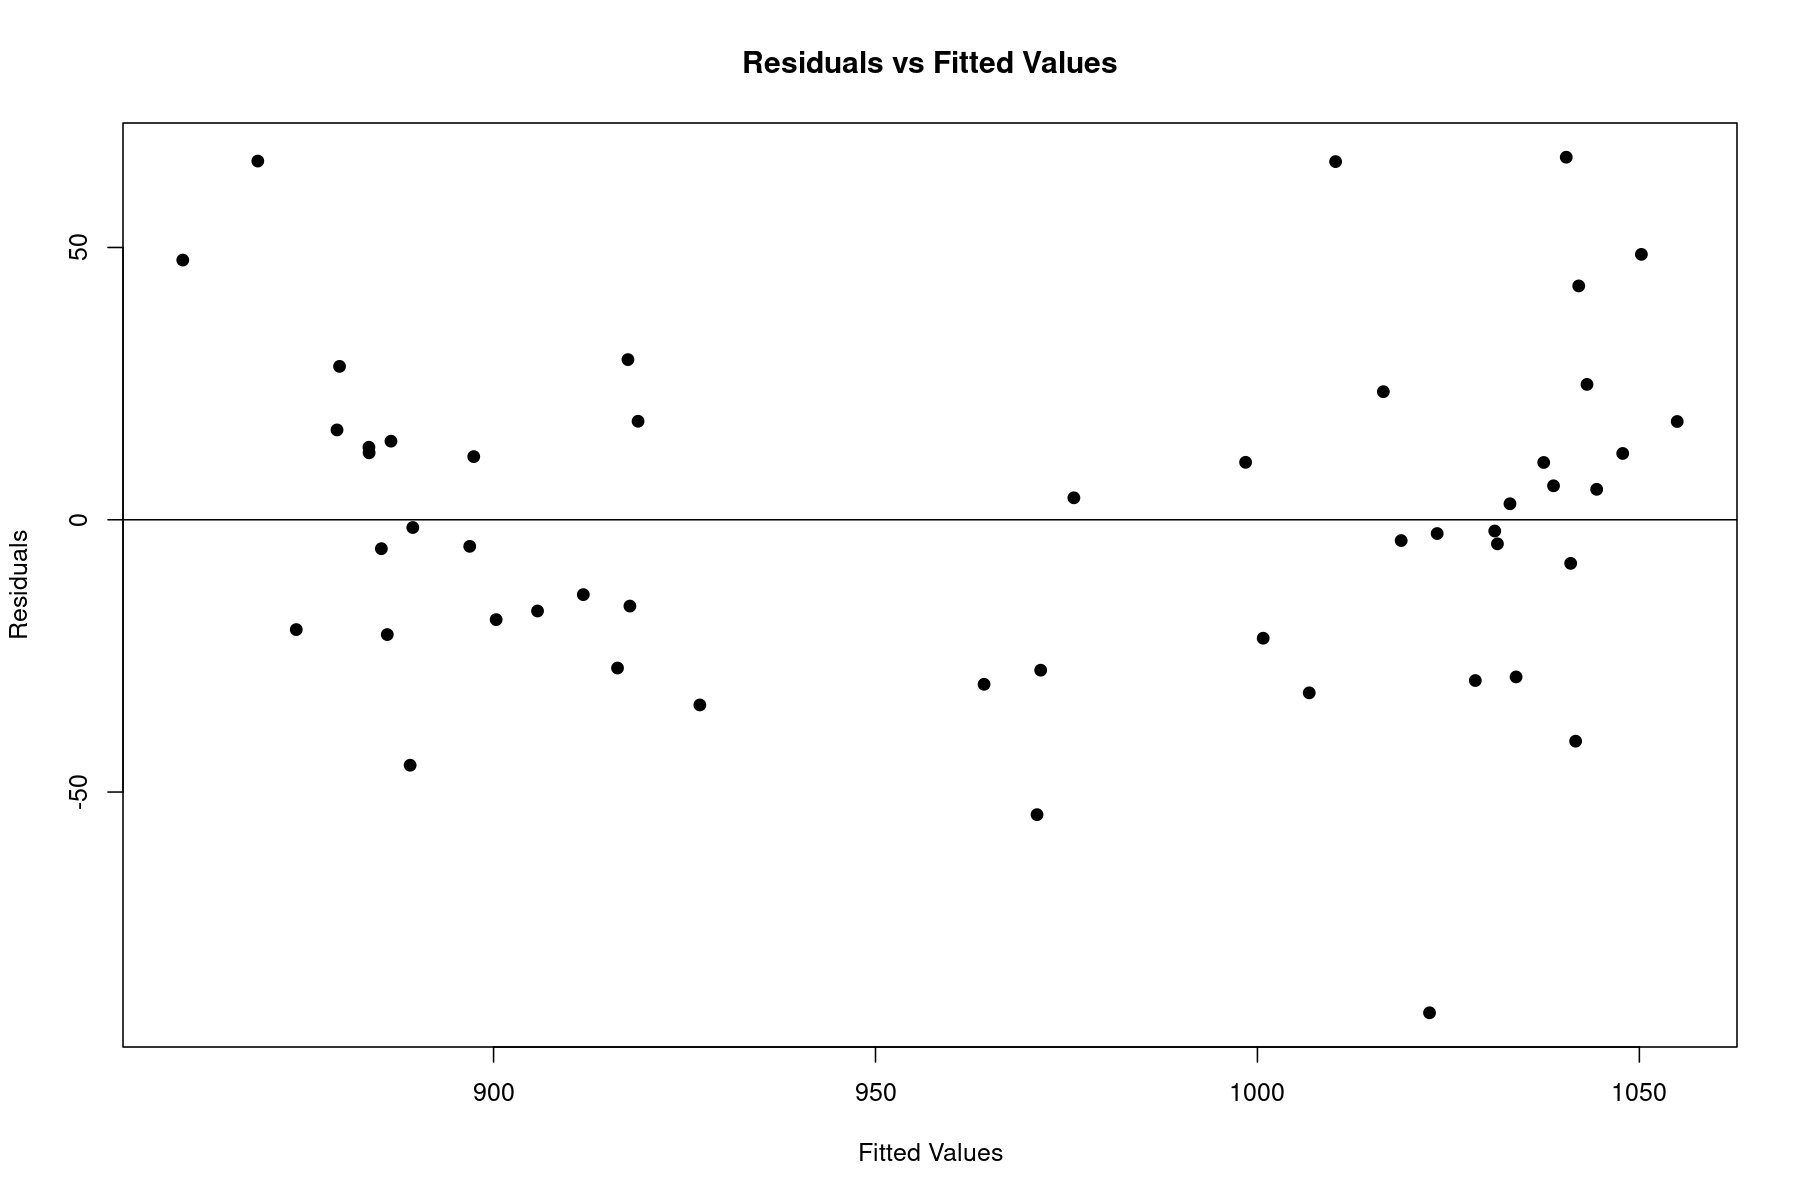

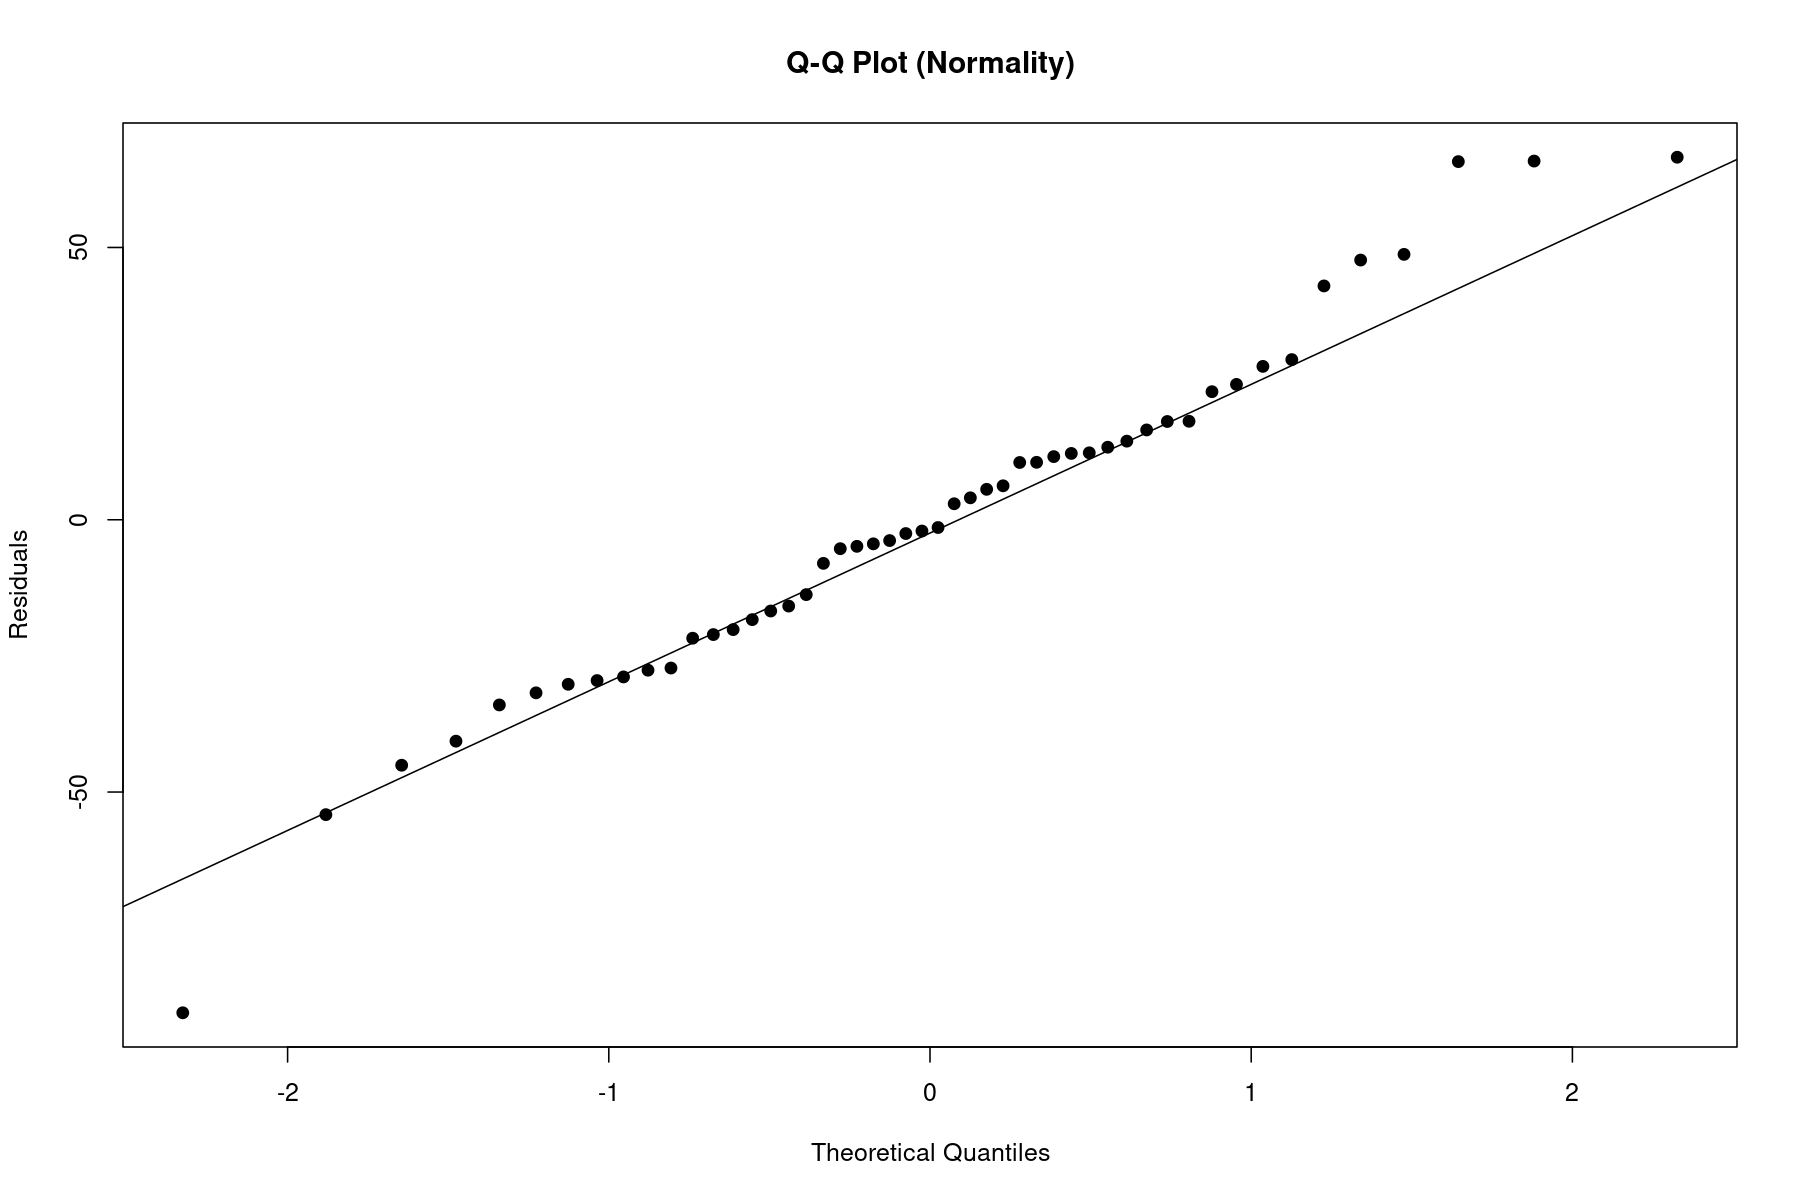

In [24]:
sat_model_test <- lm(total ~ expend + salary + ratio + takers, data = sat)
summary(sat_model_test)
plot(x = sat_model_test$fitted.values, y = sat_model_test$residuals, pch = 19,
     main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0)
qqnorm(sat_model_test$residuals, ylab = "Residuals", main = "Q-Q Plot (Normality)", pch = 19)
qqline(sat_model_test$residuals)

In [25]:
t(sat)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,⋯,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
expend,4.405,8.963,4.778,4.459,4.992,5.443,8.817,7.030,5.718,5.193,⋯,4.775,4.388,5.222,3.656,6.750,5.327,5.906,6.107,6.930,6.160
ratio,17.200,17.600,19.300,17.100,24.000,18.400,14.400,16.600,19.100,16.300,⋯,14.400,18.600,15.700,24.300,13.800,14.600,20.200,14.800,15.900,14.900
salary,31.144,47.951,32.175,28.934,41.078,34.571,50.045,39.076,32.588,32.291,⋯,25.994,32.477,31.223,29.082,35.406,33.987,36.151,31.944,37.746,31.285
takers,8.000,47.000,27.000,6.000,45.000,29.000,81.000,68.000,48.000,65.000,⋯,5.000,12.000,47.000,4.000,68.000,65.000,48.000,17.000,9.000,10.000
verbal,491.000,445.000,448.000,482.000,417.000,462.000,431.000,429.000,420.000,406.000,⋯,505.000,497.000,419.000,513.000,429.000,428.000,443.000,448.000,501.000,476.000
math,538.000,489.000,496.000,523.000,485.000,518.000,477.000,468.000,469.000,448.000,⋯,563.000,543.000,474.000,563.000,472.000,468.000,494.000,484.000,572.000,525.000
total,1029.000,934.000,944.000,1005.000,902.000,980.000,908.000,897.000,889.000,854.000,⋯,1068.000,1040.000,893.000,1076.000,901.000,896.000,937.000,932.000,1073.000,1001.000


Use the ***fat data***, fitting the model described in Section 4.2. 

(a) Compute the condition numbers and variance inflation factors. Comment on the degree of collinearity observed in the data.   
(b) Cases 39 and 42 are unusual. Refit the model without these two cases and recompute the collinearity diagnostics. Comment on the differences observed from the full data fit.   (c) Fit a model with brozek as the response and just age, weight and height as predictors. Compute the collinearity diagnostics and compare to the full data fit.   
(d) Compute a 95% prediction interval for brozek for the median values of age, weight and height.   
(e) Compute a 95% prediction interval for brozek for age=40, weight=200 and height=73. How does the interval compare to the previous prediction?  
(f) Compute a 95% prediction interval for brozek for age=40, weight=130 and height=73. Are the values of predictors unusual? Comment on how the inter- val compares to the previous two answers.  

In [26]:
#a)
fat %>% head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,26.5,167.0,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [27]:
fat_model1 <- lm(brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist, data = fat)
X <- model.matrix(fat_model1)[,-1]
eigen_X <- eigen(t(X) %*% X)
print(eigen_X)

eigen() decomposition
$values
 [1] 1.959256e+07 6.418499e+04 3.059739e+04 5.704341e+03 2.803947e+03
 [6] 1.934715e+03 1.030340e+03 6.376692e+02 5.280964e+02 4.318186e+02
[11] 3.763758e+02 2.723663e+02 6.345357e+01

$vectors
             [,1]        [,2]        [,3]        [,4]         [,5]        [,6]
 [1,] -0.16046969 -0.67112357  0.67187610  0.20965769 -0.140234718 -0.05897683
 [2,] -0.64918075  0.60019736  0.34421925  0.31273743  0.002042451 -0.01175609
 [3,] -0.25050586 -0.29113810 -0.44638237  0.55101849  0.267020821  0.46800488
 [4,] -0.13624833 -0.10313973 -0.10965862  0.05152610  0.042098603 -0.14408647
 [5,] -0.36250605 -0.19152259 -0.11106668 -0.31595033  0.622075443 -0.44160595
 [6,] -0.33387820 -0.07643179  0.12685520 -0.62556869  0.090585519  0.58096724
 [7,] -0.35881675 -0.15881365 -0.29608760 -0.15801332 -0.499761752  0.02244501
 [8,] -0.21354826 -0.03699164 -0.21593003 -0.13799998 -0.482465374 -0.19786394
 [9,] -0.13838606 -0.09578873 -0.13218782  0.06655184 -0.15376239

In [28]:
sqrt(max(eigen_X$values)/eigen_X$values)

[1]   1.00000  17.47144  25.30482  58.60610  83.59121 100.63222 137.89717
 [8] 175.28623 192.61449 213.00748 228.15747 268.20620 555.67072

In [29]:
VIF <- summary(lm(X[,1] ~ X[,-1]))$r.squared

VIF <- 1 / (1 - VIF)

print(VIF)

[1] 2.25045


In [30]:
vif_x <- rep(0, ncol(X))


for(i in 1:ncol(X)){
    vif_x[i] <- 1 / (1 - summary(lm(X[,i] ~ X[,-i]))$r.squared)    
}

vif_x <- as_tibble(cbind(colnames(X), vif_x))

vif_x <- vif_x %>% mutate(vif_x = as.numeric(vif_x))

print(vif_x)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


# A tibble: 13 × 2
   V1      vif_x
   <chr>   <dbl>
 1 age      2.25
 2 weight  33.5 
 3 height   1.67
 4 neck     4.32
 5 chest    9.46
 6 abdom   11.8 
 7 hip     14.8 
 8 thigh    7.78
 9 knee     4.61
10 ankle    1.91
11 biceps   3.62
12 forearm  2.19
13 wrist    3.38


In [31]:
print(faraway::vif(X))

      age    weight    height      neck     chest     abdom       hip     thigh 
 2.250450 33.509320  1.674591  4.324463  9.460877 11.767073 14.796520  7.777865 
     knee     ankle    biceps   forearm     wrist 
 4.612147  1.907961  3.619744  2.192492  3.377515 


In [32]:
#b)

new_fat <- fat[-c(39,42),]

In [65]:
fat_model2 <- lm(brozek ~ age + weight + height + neck + chest + abdom + hip + thigh + knee + ankle + biceps + forearm + wrist, data = new_fat)
X2 <- model.matrix(fat_model2)[,-1]
eigen_X2 <- eigen(t(X2) %*% X2)

sqrt(eigen_X2$values[1]/eigen_X2$values)

vif_x2 <- rep(0, ncol(X2))


for(i in 1:ncol(X2)){
    vif_x2[i] <- 1 / (1 - summary(lm(X2[,i] ~ X2[,-i]))$r.squared)    
}

vif_x2 <- as_tibble(cbind(colnames(X2), vif_x2))

vif_x2 <- vif_x2 %>% mutate(vif_x2 = as.numeric(vif_x2))

print(vif_x2)

[1]   1.00000  18.39787  26.21547  61.53224  91.07633 114.44792 148.72518
 [8] 178.80871 202.08708 211.78359 240.69468 276.35018 554.79777

# A tibble: 13 × 2
   V1      vif_x2
   <chr>    <dbl>
 1 age       2.28
 2 weight   45.3 
 3 height    3.44
 4 neck      3.98
 5 chest    10.7 
 6 abdom    12.0 
 7 hip      12.1 
 8 thigh     7.15
 9 knee      4.44
10 ankle     1.81
11 biceps    3.41
12 forearm   2.42
13 wrist     3.26


In [66]:
#vif_compare <- cbind()

vif_compare <- as_tibble(cbind(colnames(X), vif_x[,2], vif_x2[,2]))

colnames(vif_compare) <- c("predictor", "VIF_X", "VIF_X2")

vif_compare %>% as_tibble() %>% select(VIF_X, VIF_X2) %>% mutate(Diff = VIF_X - VIF_X2)

print(vif_compare)

VIF_X,VIF_X2,Diff
<dbl>,<dbl>,<dbl>
2.250450,2.278191,-0.02774050
33.509320,45.298843,-11.78952368
1.674591,3.439587,-1.76499647
4.324463,3.978898,0.34556532
9.460877,10.712505,-1.25162792
11.767073,11.967580,-0.20050630
14.796520,12.146249,2.65027070
7.777865,7.153711,0.62415364
4.612147,4.441752,0.17039430


# A tibble: 13 × 3
   predictor VIF_X VIF_X2
   <chr>     <dbl>  <dbl>
 1 age        2.25   2.28
 2 weight    33.5   45.3 
 3 height     1.67   3.44
 4 neck       4.32   3.98
 5 chest      9.46  10.7 
 6 abdom     11.8   12.0 
 7 hip       14.8   12.1 
 8 thigh      7.78   7.15
 9 knee       4.61   4.44
10 ankle      1.91   1.81
11 biceps     3.62   3.41
12 forearm    2.19   2.42
13 wrist      3.38   3.26


In [35]:
#c)

fat_model3 <- lm(brozek ~ age + weight + height, data = new_fat)
summary(fat_model3)


Call:
lm(formula = brozek ~ age + weight + height, data = new_fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0260  -3.6537   0.0569   3.7588  11.9011 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54.31985    9.63347   5.639 4.69e-08 ***
age          0.12575    0.02599   4.838 2.31e-06 ***
weight       0.23519    0.01373  17.124  < 2e-16 ***
height      -1.18089    0.14638  -8.067 3.17e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.986 on 246 degrees of freedom
Multiple R-squared:  0.5838,	Adjusted R-squared:  0.5787 
F-statistic:   115 on 3 and 246 DF,  p-value: < 2.2e-16


In [36]:
X3 <- model.matrix(fat_model3)[,-1]
eigen_X3 <- eigen(t(X3) %*% X3)

sqrt(eigen_X3$values[1]/eigen_X3$values)

vif_x3 <- rep(0, ncol(X3))


for(i in 1:ncol(X3)){
    vif_x3[i] <- 1 / (1 - summary(lm(X3[,i] ~ X3[,-i]))$r.squared)    
}

vif_x3 <- cbind(colnames(X3), vif_x3)
print(vif_x3)

[1]  1.00000 13.87911 25.03771

              vif_x3            
[1,] "age"    "1.08330491018921"
[2,] "weight" "1.3811645842945" 
[3,] "height" "1.46966479387396"


In [37]:
#d)

fat_1 <- as.data.frame(t(apply(X3, 2, median)))

predict(fat_model3, newdata = fat_1, interval = "prediction")

,fit,lwr,upr
1,18.48834,8.647863,28.32882


In [38]:
#e)

fat_2 <- as.data.frame(cbind(age = 40, weight = 200, height = 73))

predict(fat_model3, newdata = fat_2, interval = "prediction")

,fit,lwr,upr
1,20.18367,10.32046,30.04688


In [39]:
#f)

fat_3 <- as.data.frame(cbind(age = 40, weight = 130, height = 73))

predict(fat_model3, newdata = fat_3, interval = "prediction")

,fit,lwr,upr
1,3.720148,-6.28208,13.72238


In [40]:
#4 a)

df_commercial <- read_table("commercial_property.txt")


── Column specification ────────────────────────────────────────────────────────
cols(
  rental_rates = col_double(),
  age = col_double(),
  opp_expenses = col_double(),
  vac_rates = col_double(),
  tot_squft = col_double()
)



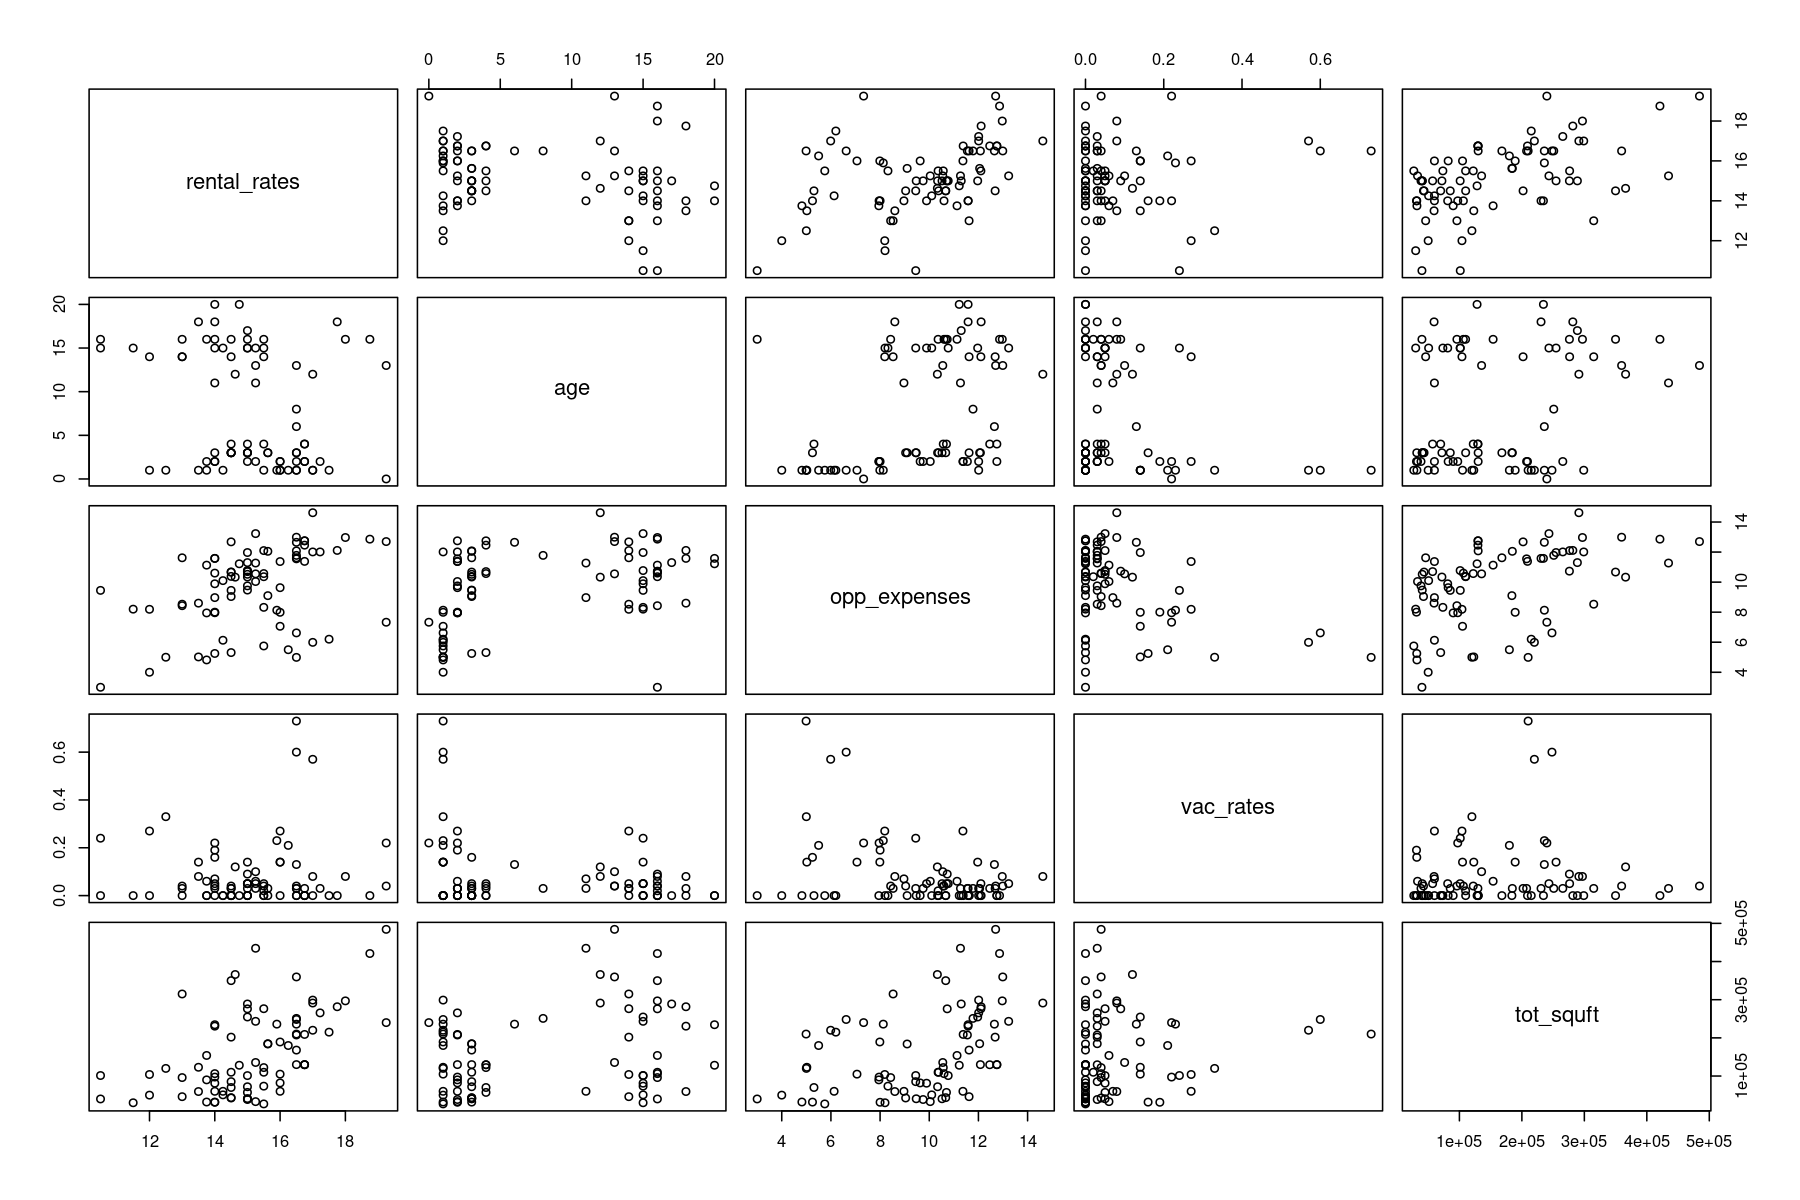

In [41]:
df_commercial %>% pairs()

In [42]:
#b)
cor(df_commercial)

,rental_rates,age,opp_expenses,vac_rates,tot_squft
rental_rates,1.00000000,-0.2502846,0.4137872,0.06652647,0.53526237
age,-0.25028456,1.0000000,0.3888264,-0.25266347,0.28858350
opp_expenses,0.41378716,0.3888264,1.0000000,-0.37976174,0.44069713
vac_rates,0.06652647,-0.2526635,-0.3797617,1.00000000,0.08061073
tot_squft,0.53526237,0.2885835,0.4406971,0.08061073,1.00000000


In [43]:
#c)
comm_model1 <- lm(rental_rates ~ ., data = df_commercial)
summary(comm_model1)


Call:
lm(formula = rental_rates ~ ., data = df_commercial)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1872 -0.5911 -0.0910  0.5579  2.9441 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.220e+01  5.780e-01  21.110  < 2e-16 ***
age          -1.420e-01  2.134e-02  -6.655 3.89e-09 ***
opp_expenses  2.820e-01  6.317e-02   4.464 2.75e-05 ***
vac_rates     6.193e-01  1.087e+00   0.570     0.57    
tot_squft     7.924e-06  1.385e-06   5.722 1.98e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.137 on 76 degrees of freedom
Multiple R-squared:  0.5847,	Adjusted R-squared:  0.5629 
F-statistic: 26.76 on 4 and 76 DF,  p-value: 7.272e-14


In [44]:
print(round(coef(comm_model1), 3))

 (Intercept)          age opp_expenses    vac_rates    tot_squft 
      12.201       -0.142        0.282        0.619        0.000 


In [45]:
summary(comm_model1)$r.squared
summary(comm_model1)$adj.r.squared

[1] 0.5847496

[1] 0.5628943

In [46]:
library(nlme)

summary(gls(rental_rates ~ ., data = df_commercial))


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse




Generalized least squares fit by REML
  Model: rental_rates ~ . 
  Data: df_commercial 
       AIC     BIC    logLik
  293.2916 307.276 -140.6458

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept)  12.200586 0.5779562 21.109881  0.0000
age          -0.142034 0.0213426 -6.654933  0.0000
opp_expenses  0.282017 0.0631723  4.464240  0.0000
vac_rates     0.619344 1.0868128  0.569871  0.5704
tot_squft     0.000008 0.0000014  5.722446  0.0000

 Correlation: 
             (Intr) age    opp_xp vc_rts
age          -0.032                     
opp_expenses -0.889 -0.201              
vac_rates    -0.516  0.175  0.412       
tot_squft     0.200 -0.189 -0.454 -0.322

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.8034364 -0.5198884 -0.0800025  0.4907637  2.5896591 

Residual standard error: 1.136885 
Degrees of freedom: 81 total; 76 residual

In [47]:
comm_model2 <- lm(rental_rates ~ .-vac_rates, data = df_commercial)
summary(comm_model2)


Call:
lm(formula = rental_rates ~ . - vac_rates, data = df_commercial)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0620 -0.6437 -0.1013  0.5672  2.9583 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.237e+01  4.928e-01  25.100  < 2e-16 ***
age          -1.442e-01  2.092e-02  -6.891 1.33e-09 ***
opp_expenses  2.672e-01  5.729e-02   4.663 1.29e-05 ***
tot_squft     8.178e-06  1.305e-06   6.265 1.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.132 on 77 degrees of freedom
Multiple R-squared:  0.583,	Adjusted R-squared:  0.5667 
F-statistic: 35.88 on 3 and 77 DF,  p-value: 1.295e-14


In [121]:
#d) I
model_coeff <- summary(comm_model2)$coefficients

model_coeff <- as_tibble(model_coeff)

colnames(model_coeff)[2] = 'Error'

model_coeff <- model_coeff %>% mutate(CI90neg = Estimate - qt(0.95, 77) * Error, CI90pos = Estimate + qt(0.95, 77) * Error)

#print(names(model_coeff)[2])

model_coeff

confint(comm_model2, level = 0.9)

Estimate,Error,t value,Pr(>|t|),CI90neg,CI90pos
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.237058e+01,4.928469e-01,25.100252,8.097749e-39,1.155005e+01,1.319112e+01
-1.441646e-01,2.092012e-02,-6.891194,1.334924e-09,-1.789942e-01,-1.093351e-01
2.671670e-01,5.729487e-02,4.663018,1.286620e-05,1.717777e-01,3.625564e-01
8.178210e-06,1.305377e-06,6.265018,1.972689e-08,6.004908e-06,1.035151e-05


,5 %,95 %
(Intercept),1.155005e+01,1.319112e+01
age,-1.789942e-01,-1.093351e-01
opp_expenses,1.717777e-01,3.625564e-01
tot_squft,6.004908e-06,1.035151e-05


In [116]:
confint(comm_model2, level = 0.9)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
6 -2.885541           0.005083      0.41172

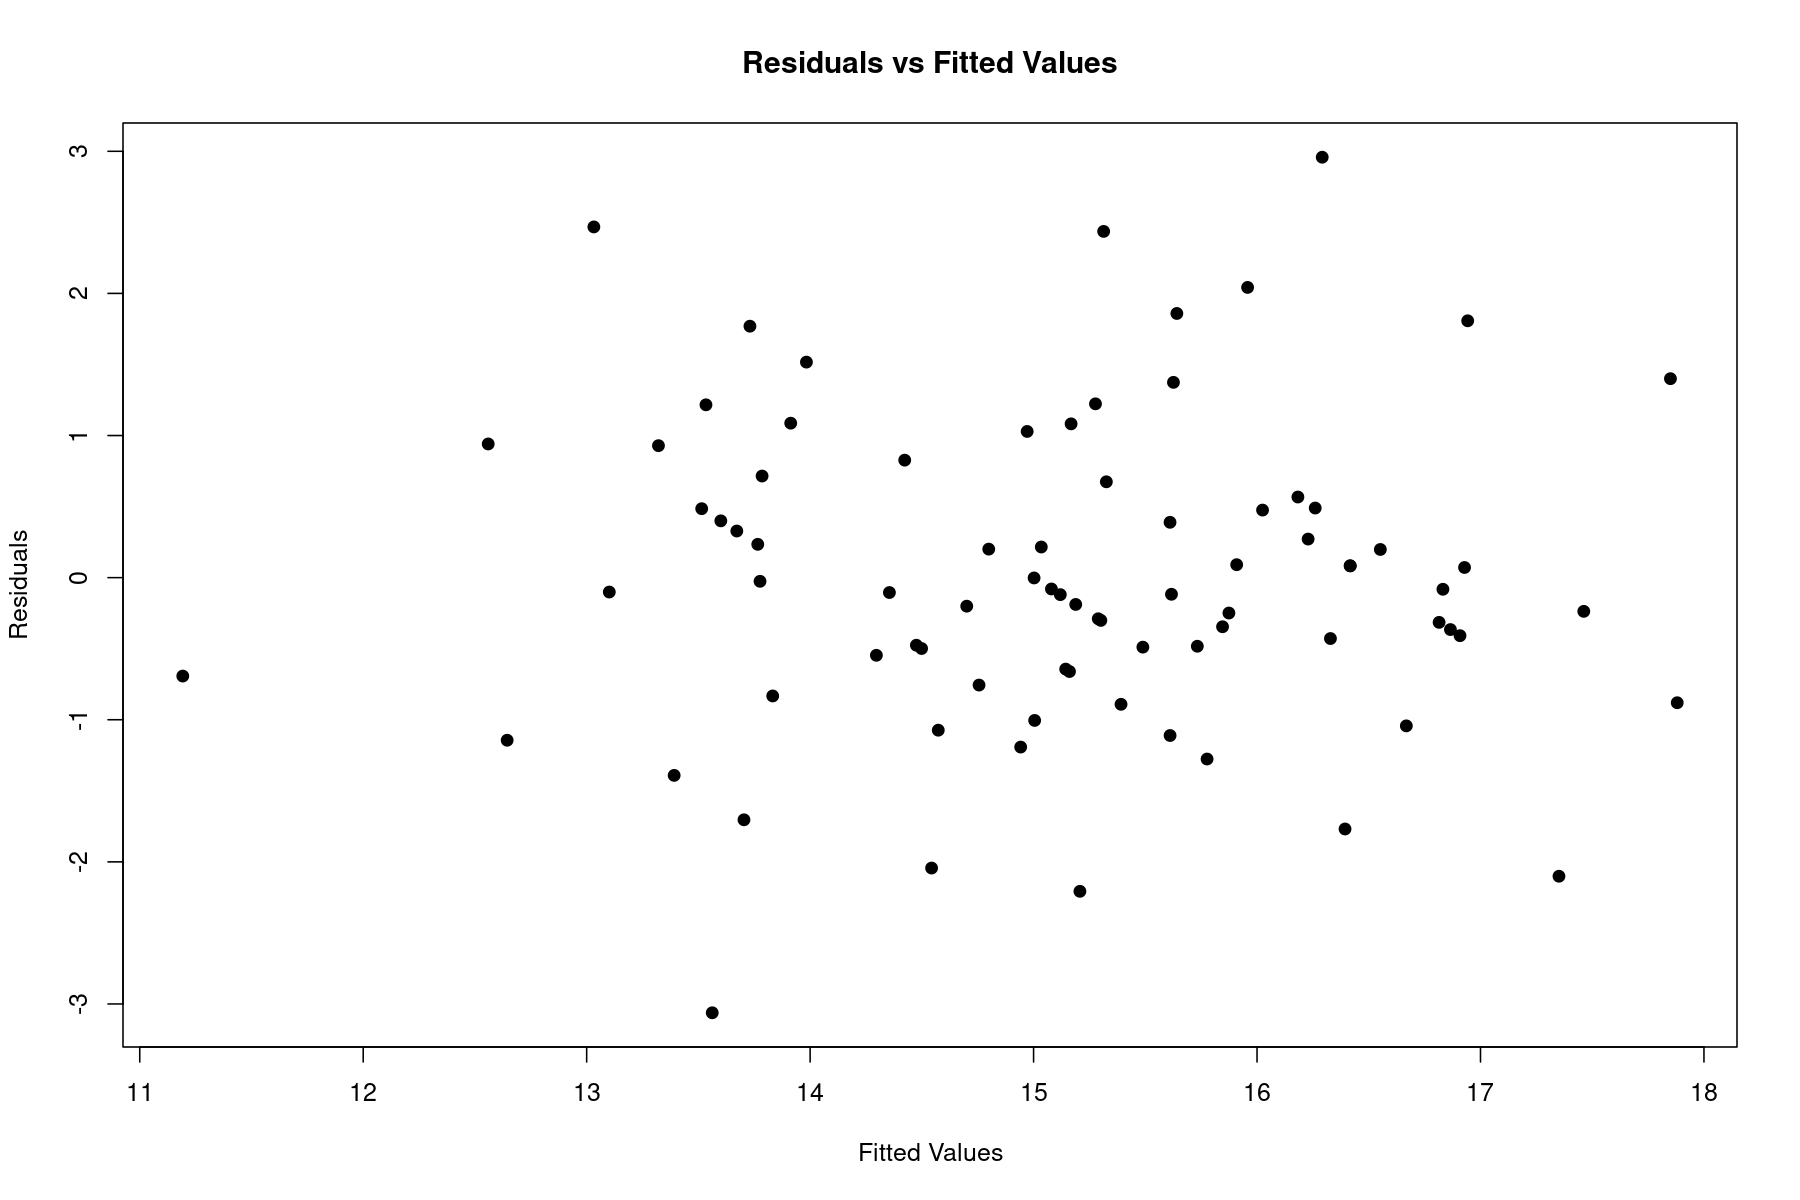

In [124]:
#e a

plot(x = comm_model2$fitted.values, y = comm_model2$residuals, pch = 19,
     main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

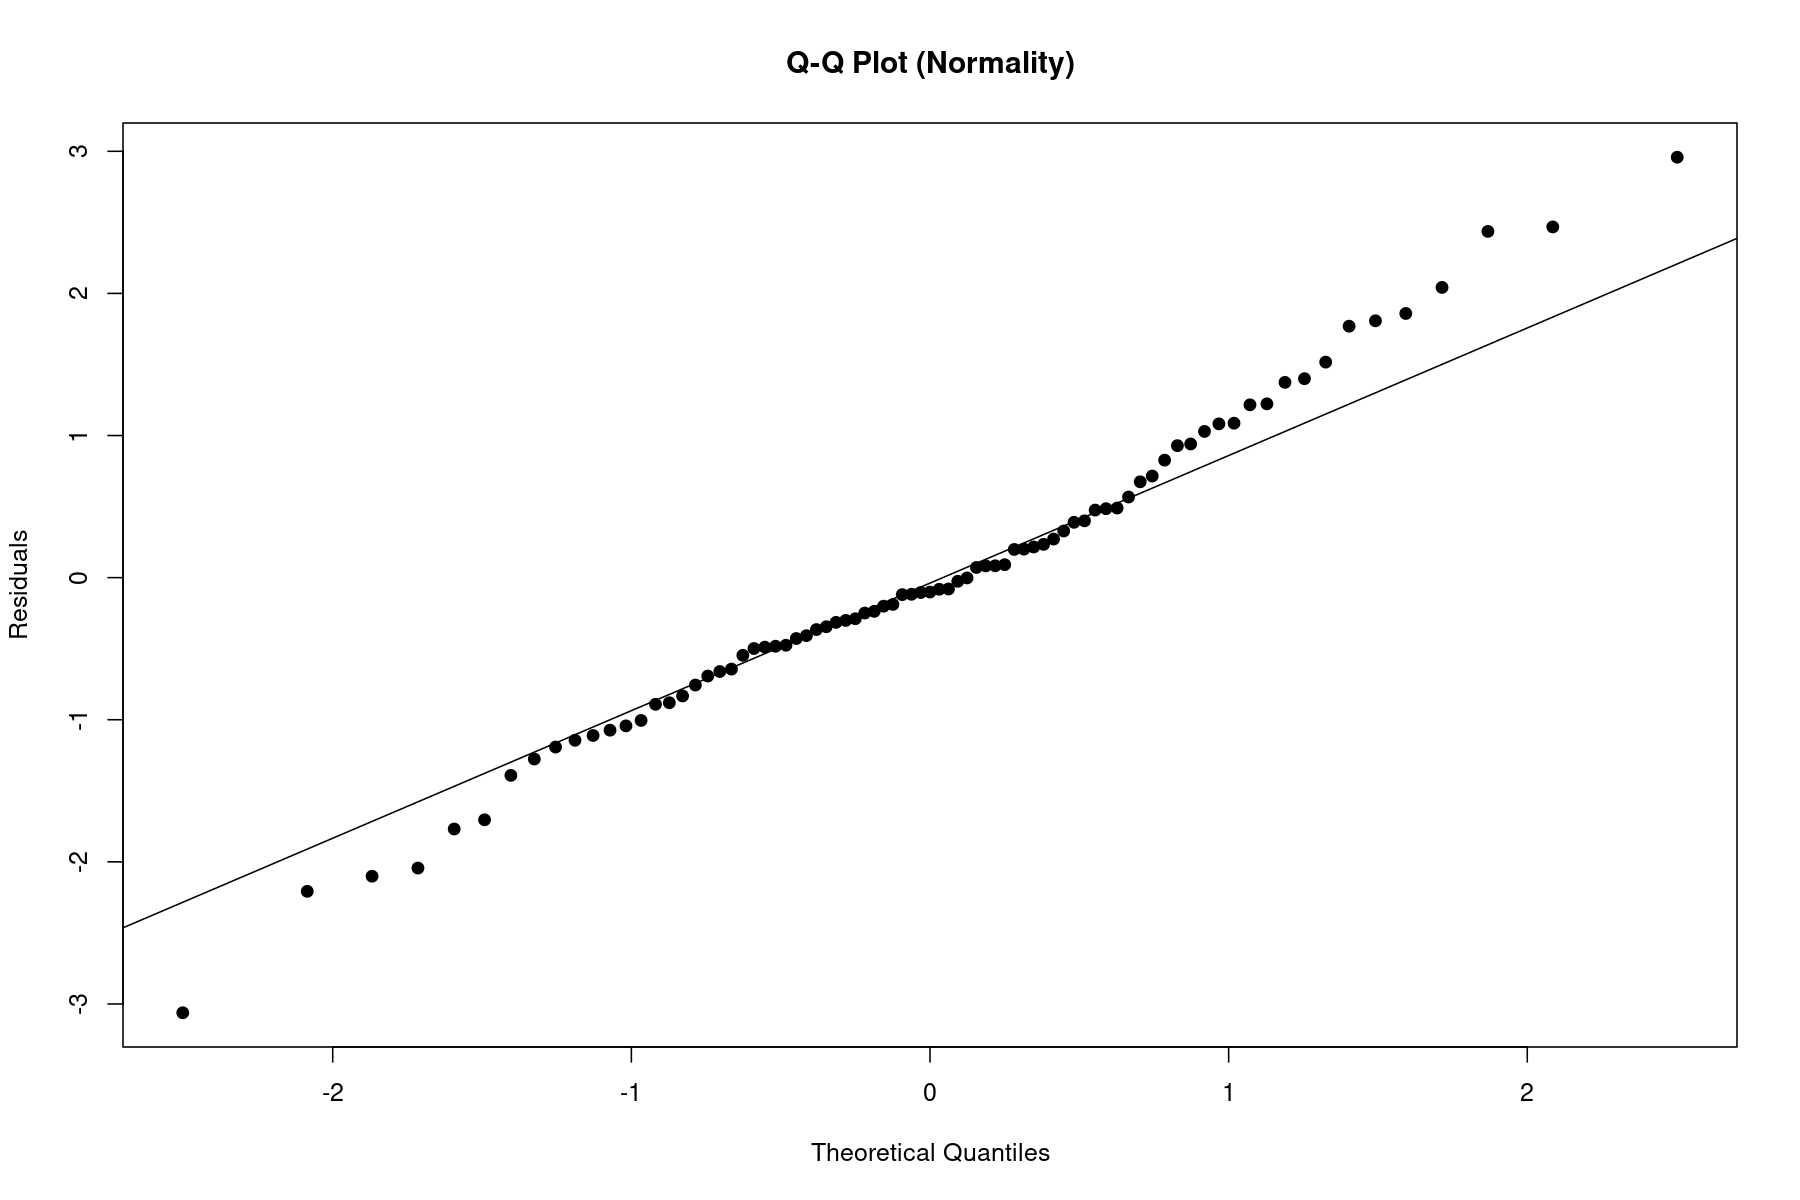

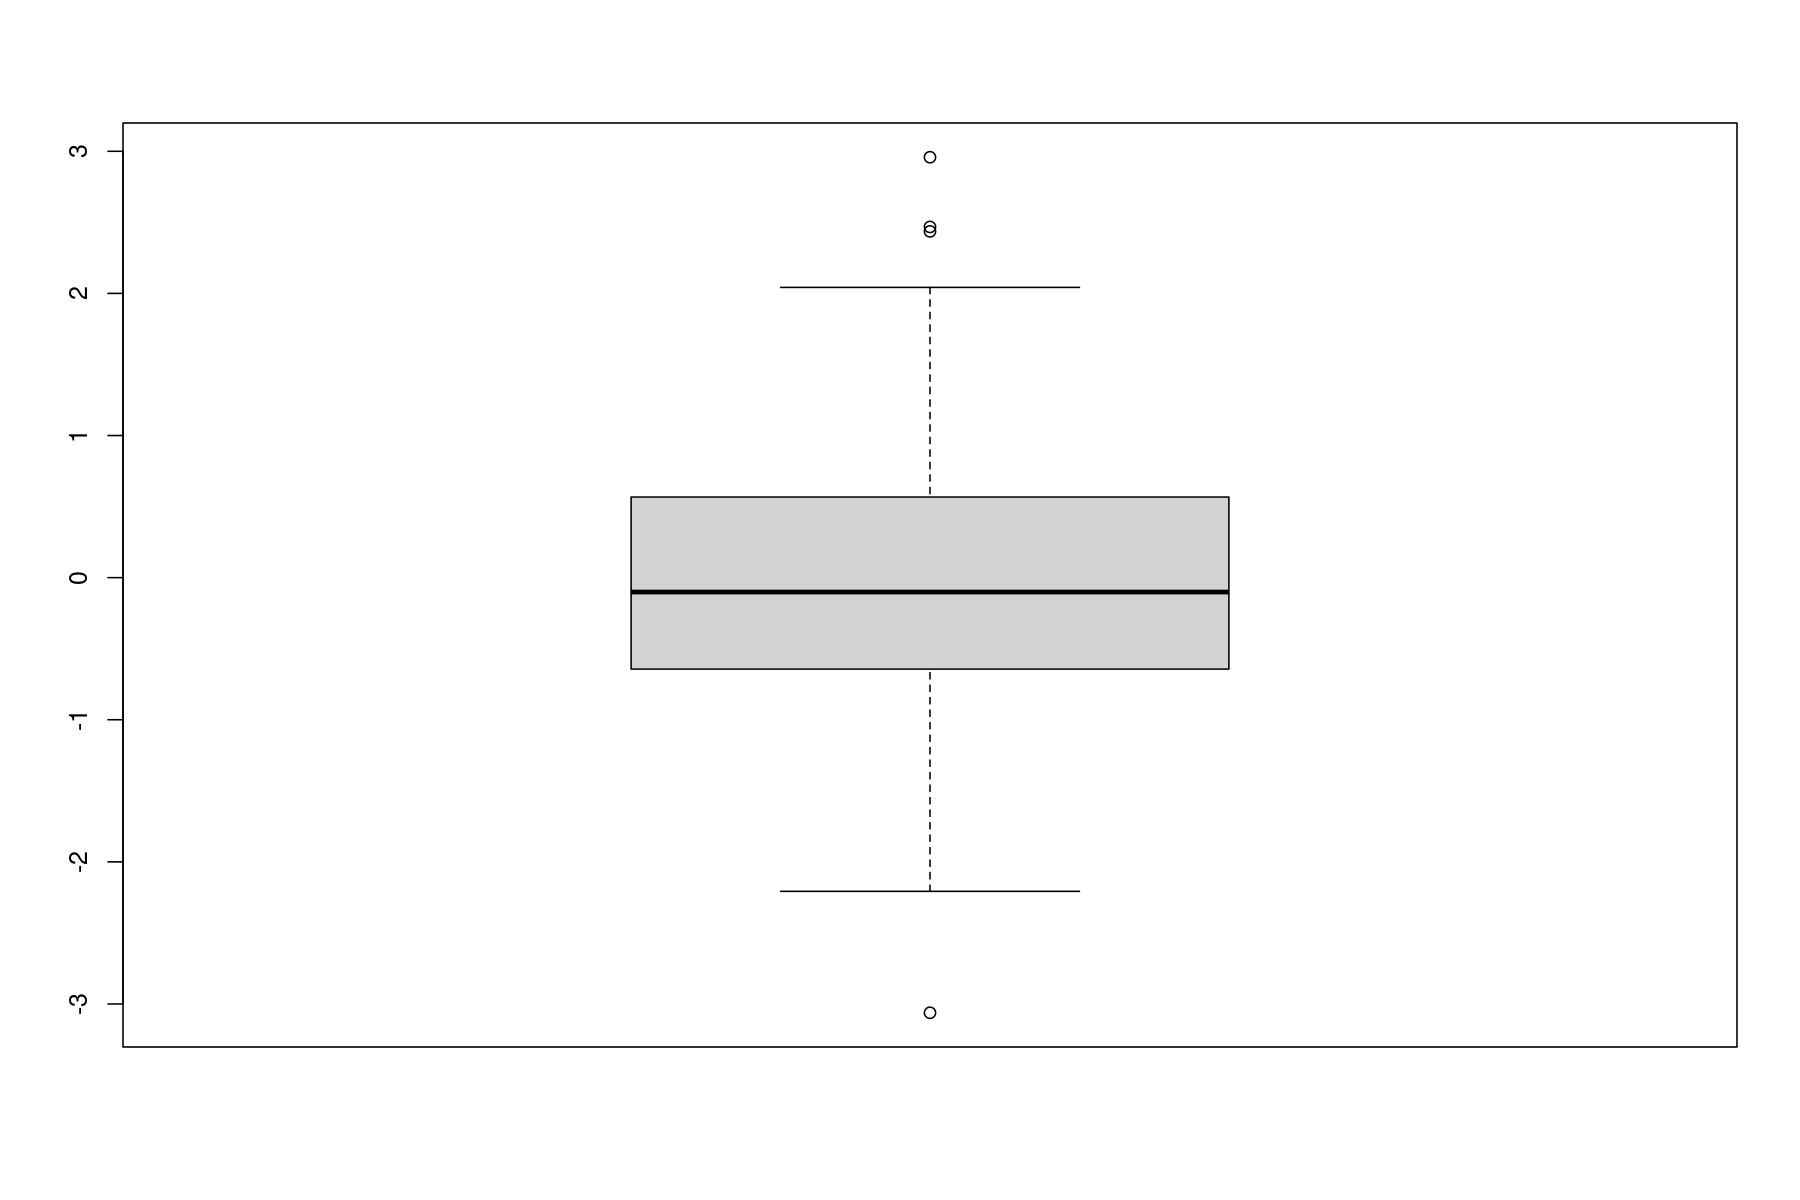

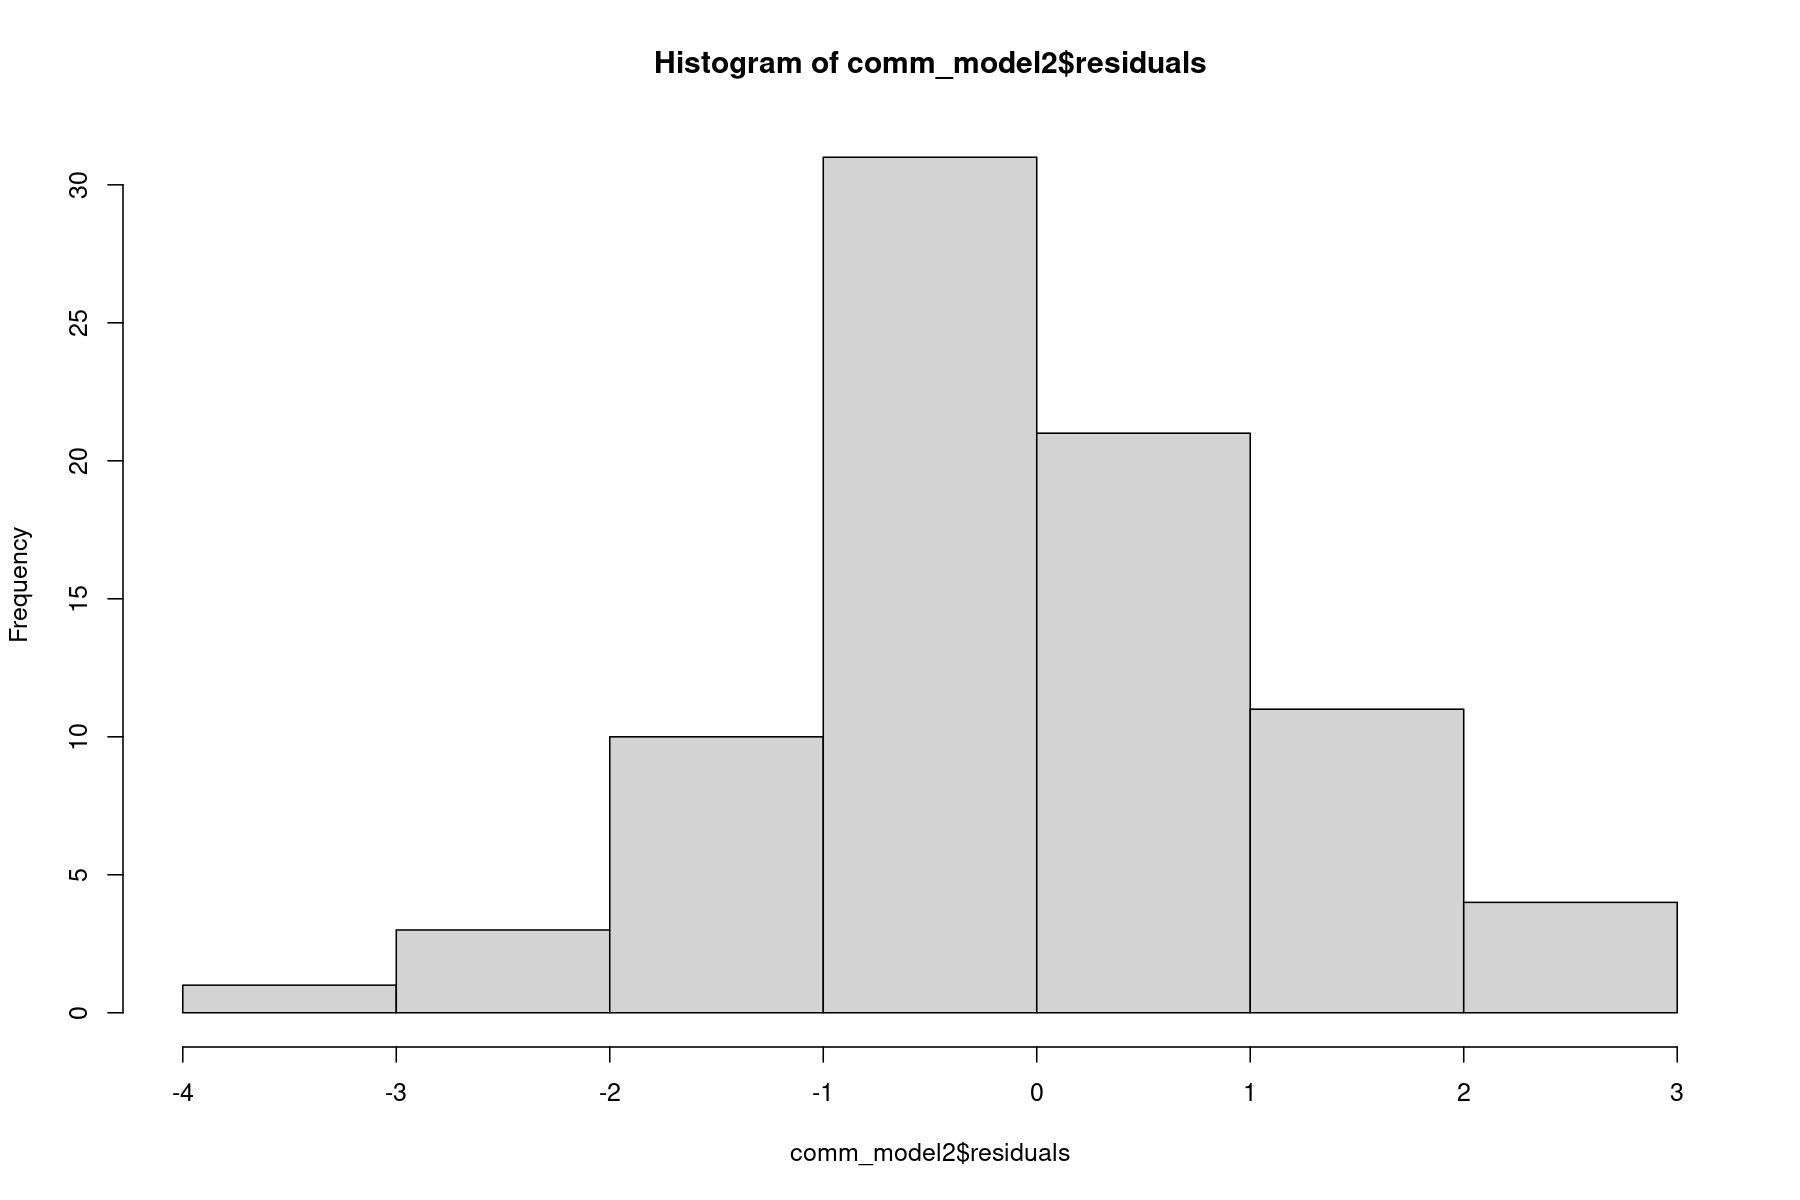

In [127]:
#e b

qqnorm(comm_model2$residuals, ylab = "Residuals", main = "Q-Q Plot (Normality)", pch = 19)
qqline(comm_model2$residuals)

boxplot(comm_model2$residuals)

hist(comm_model2$residuals)

In [133]:
# e c

bptest(comm_model2, studentize = FALSE)
print("++++++++++++++++++++++++++++++++++++++")
ncvTest(comm_model2)


	Breusch-Pagan test

data:  comm_model2
BP = 17.281, df = 3, p-value = 0.0006187


[1] "++++++++++++++++++++++++++++++++++++++"


Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.3359664, Df = 1, p = 0.56217

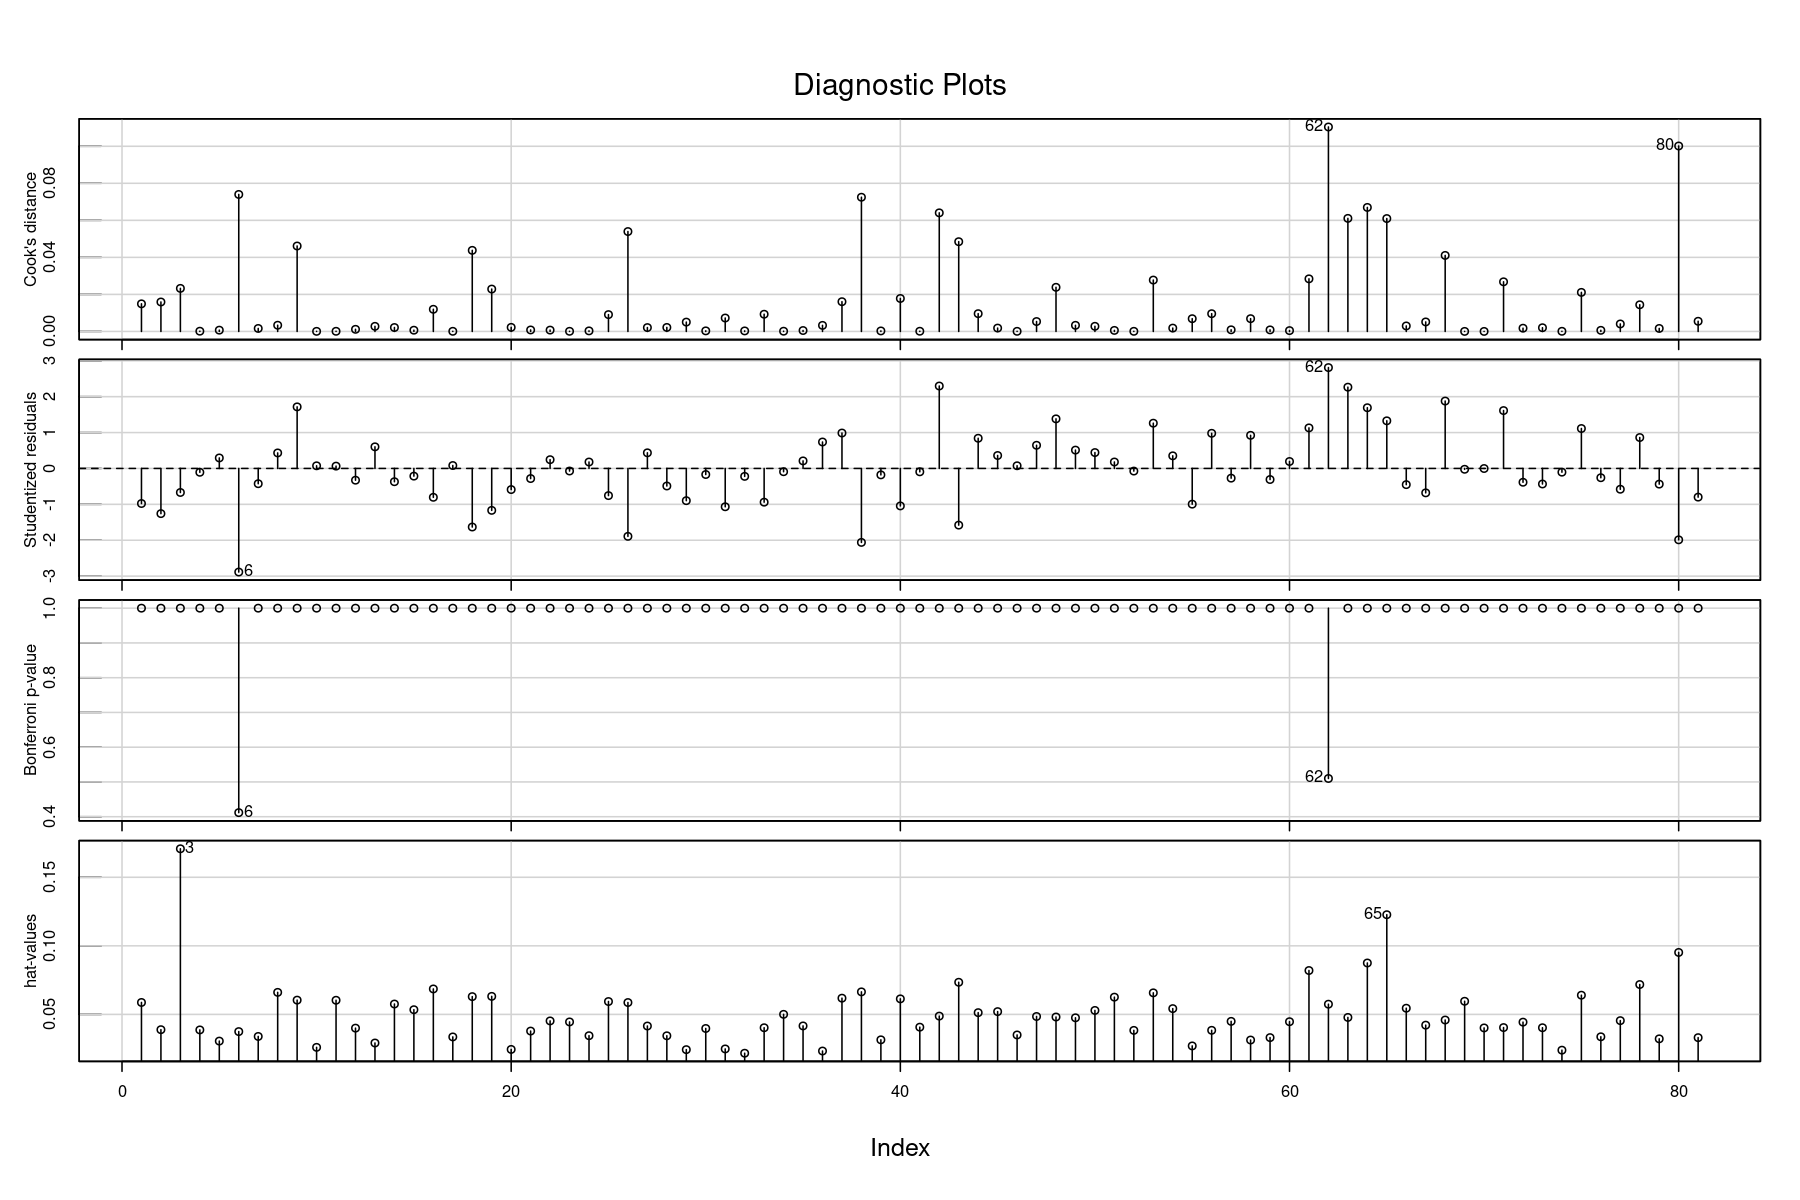

In [130]:
influenceIndexPlot(comm_model2)

In [131]:
shapiro.test(comm_model2$residuals)
dwtest(comm_model2)


	Shapiro-Wilk normality test

data:  comm_model2$residuals
W = 0.98776, p-value = 0.6406



	Durbin-Watson test

data:  comm_model2
DW = 1.5867, p-value = 0.02463
alternative hypothesis: true autocorrelation is greater than 0



Call:
lm(formula = rental_rates ~ . - vac_rates, data = df_commercial[-c(6, 
    62, 80), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29323 -0.62754 -0.04509  0.58356  2.32591 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.224e+01  4.432e-01  27.626  < 2e-16 ***
age          -1.291e-01  1.899e-02  -6.796 2.36e-09 ***
opp_expenses  2.739e-01  5.148e-02   5.320 1.06e-06 ***
tot_squft     8.003e-06  1.233e-06   6.491 8.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.008 on 74 degrees of freedom
Multiple R-squared:  0.6203,	Adjusted R-squared:  0.6049 
F-statistic:  40.3 on 3 and 74 DF,  p-value: 1.515e-15


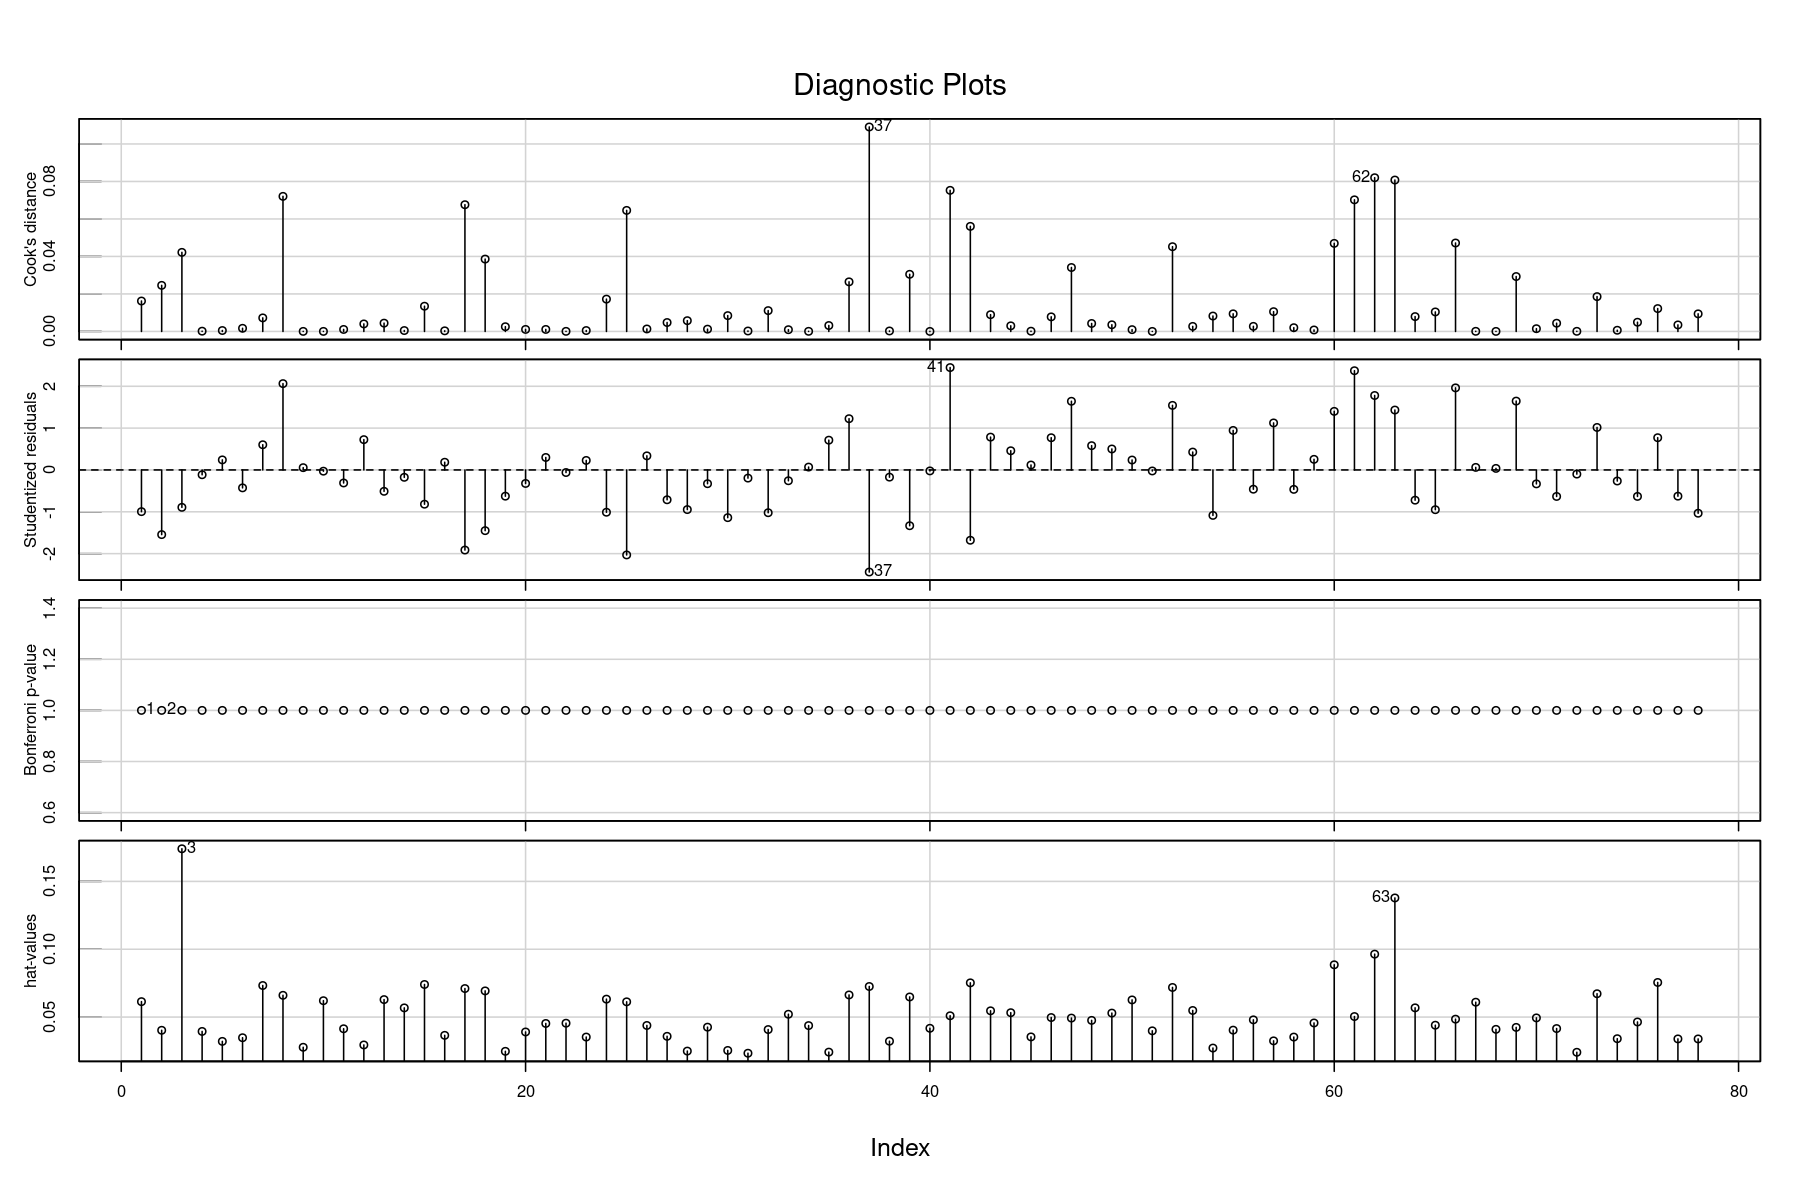

In [146]:
#f)

comm_model3 <- lm(rental_rates ~ . - vac_rates, df_commercial[-c(6, 62, 80), ])

summary(comm_model3)

influenceIndexPlot(comm_model3)

In [149]:
#g 

new_prop <- tibble(age = 5, opp_expenses = 8.25, vac_rates = 0, tot_squft = 250000)

predict(comm_model3, newdata = new_prop, interval = "prediction", level = 0.9)

,fit,lwr,upr
1,15.85789,14.14486,17.57092


In [171]:
# 5
df_software <- read_table("software_sales.txt") 
df_software %>%  select(Rep) %>% unique() %>% as.vector()
df_software %>%  select(Software) %>% unique()  %>% as.vector()
df_software$Software <- as.factor(df_software$Software - 1)


── Column specification ──────────────────────────────────────────────────────────────────────────────
cols(
  Rep = col_double(),
  Software = col_double(),
  SalesLastQuarter = col_double(),
  SalesThisQuarter = col_double()
)



$Rep
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36

$Software
[1] 1 2 3

In [179]:
sw_model1 <- lm(SalesThisQuarter ~ . -SalesLastQuarter, data = df_software)
summary(sw_model1)


Call:
lm(formula = SalesThisQuarter ~ . - SalesLastQuarter, data = df_software)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.545  -6.833   1.409   7.572  32.439 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 81.48485    4.92134  16.557   <2e-16 ***
Rep          0.01515    0.55723   0.027    0.978    
Software1   -2.18182    8.18012  -0.267    0.791    
Software2   -8.03030   14.17934  -0.566    0.575    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.54 on 32 degrees of freedom
Multiple R-squared:  0.08178,	Adjusted R-squared:  -0.004302 
F-statistic:  0.95 on 3 and 32 DF,  p-value: 0.4281


In [180]:
SST <- sum((df_software$SalesThisQuarter - mean(df_software$SalesThisQuarter))^2)
SSR <- sum((sw_model1$fitted.values - mean(df_software$SalesThisQuarter))^2)
SSE <- sum((df_software$SalesThisQuarter - sw_model1$fitted.values)^2)
MSR <- SSR/(sw_model1$rank - 1)
MSE <- SSE/(nrow(df_software) - sw_model1$rank)

df_vector <- c(sat_model1$rank - 1, nrow(sat) - sat_model1$rank, nrow(sat) - 1)
SS <- c(SSR, SSE, SST)

anova_table <- as_tibble(cbind(df_vector, SS))

anova_table <- anova_table %>% mutate(MS = SS/df_vector)

anova_table[3,3] <- NA

F_stat <- c(as.numeric(anova_table[1,3] / anova_table[2,3]), NA, NA)

p_value <- c(1 - (pf(F_stat[1], (sat_model1$rank - 1) , (nrow(sat) - sat_model1$rank))), NA, NA)

anova_table <- cbind(anova_table, F_stat, p_value)

knitr::kable(anova_table)



| df_vector|       SS|       MS|   F_stat|   p_value|
|---------:|--------:|--------:|--------:|---------:|
|         4|  379.654| 94.91351| 1.001984| 0.4165029|
|        45| 4262.652| 94.72559|       NA|        NA|
|        49| 4642.306|       NA|       NA|        NA|

In [181]:
anova(sw_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Rep,1,310.04022,310.04022,2.3274919,0.1369305
Software,2,69.61382,34.80691,0.2612977,0.7716787
Residuals,32,4262.65152,133.20786,NA,NA


In [182]:
# 6)

df_pigs <- read_table("pig_weight.txt")


── Column specification ──────────────────────────────────────────────────────────────────────────────
cols(
  Drug = col_double(),
  Momweight = col_double(),
  Dadweight = col_double(),
  Pigweight = col_double()
)



In [189]:
df_pigs %>% head()

for(i in 1:ncol(df_pigs)){
    print(count(unique(df_pigs[,i])))
}

Drug,Momweight,Dadweight,Pigweight
<dbl>,<dbl>,<dbl>,<dbl>
1,133.55,172.97,71.99
1,143.65,183.32,76.76
1,130.27,186.53,72.22
1,128.14,174.55,69.56
1,128.21,182.79,73.48
1,130.49,182.73,69.85


# A tibble: 1 × 1
      n
  <int>
1     3
# A tibble: 1 × 1
      n
  <int>
1    74
# A tibble: 1 × 1
      n
  <int>
1    74
# A tibble: 1 × 1
      n
  <int>
1    73


In [186]:
pig_model1 <- lm(Pigweight ~ ., data = df_pigs)
summary(pig_model1)


Call:
lm(formula = Pigweight ~ ., data = df_pigs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4357 -1.0893 -0.0207  1.2963  3.9551 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.53287    9.48136   1.216    0.228    
Drug        -0.36996    0.27577  -1.342    0.184    
Momweight    0.25754    0.04927   5.228 1.65e-06 ***
Dadweight    0.15613    0.03546   4.403 3.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.935 on 71 degrees of freedom
Multiple R-squared:  0.3993,	Adjusted R-squared:  0.3739 
F-statistic: 15.73 on 3 and 71 DF,  p-value: 6.084e-08
